This dataset contains features of around 18,207 football players. There are 89 attributes including personal information like age, name, nationality, photo, club, wage, etc, and also player skill information like ball control, dribbling, crossing, finishing, GK skills and etc.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('football_data.csv')
data.shape

(18207, 89)

In [3]:
data.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


We can remove the unnamed column as it is not used.

In [4]:
data.drop(['Unnamed: 0'],axis=1,inplace=True)
data.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 88 columns):
ID                          18207 non-null int64
Name                        18207 non-null object
Age                         18207 non-null int64
Photo                       18207 non-null object
Nationality                 18207 non-null object
Flag                        18207 non-null object
Overall                     18207 non-null int64
Potential                   18207 non-null int64
Club                        17966 non-null object
Club Logo                   18207 non-null object
Value                       18207 non-null object
Wage                        18207 non-null object
Special                     18207 non-null int64
Preferred Foot              18159 non-null object
International Reputation    18159 non-null float64
Weak Foot                   18159 non-null float64
Skill Moves                 18159 non-null float64
Work Rate                   18159 non-null 

We can see that Height, Weight, Wage and Release Clause are objects, so we convert them into integers.

In [6]:
data['Height'].fillna("0'0",inplace=True)
data['Weight'].fillna('0',inplace=True)

In [7]:
new = data["Height"].str.split("'", n = 1, expand = True)
new[0] = new[0].astype(float)
new[1] = new[1].astype(float)
data['Height'] = (new[0]*12)+(new[1]*2.54)
data['Height']

0        77.78
1        77.08
2        82.86
3        82.16
4        87.94
         ...  
18202    82.86
18203    79.62
18204    80.32
18205    85.40
18206    85.40
Name: Height, Length: 18207, dtype: float64

In [8]:
def extract_value_from(value):
    out = value.replace('lbs', '')
    return float(out)

# applying the function to weight column
data['Weight'] = data['Weight'].apply(lambda x : extract_value_from(x))

data['Weight'].head()

0    159.0
1    183.0
2    150.0
3    168.0
4    154.0
Name: Weight, dtype: float64

In [9]:
def extract_value_from(y):
    
    if '€' in y:
        y = y.replace('€', '')
    if 'M' in y:
        y = y.replace('M', '')
    elif 'K' in y:
        y = y.replace('K', '')
    return float(y)


data['Wage'] = data['Wage'].apply(lambda x: extract_value_from(x))

data['Wage'].head()

0    565.0
1    405.0
2    290.0
3    260.0
4    355.0
Name: Wage, dtype: float64

In [10]:
data["Release Clause"] = [str(x).replace('€',' ') for x in data["Release Clause"]]
data["Release Clause"] = [str(x).replace('M',' ') for x in data["Release Clause"]]
data["Release Clause"] = [str(x).replace('K',' ') for x in data["Release Clause"]]
data["Release Clause"] = data["Release Clause"].astype(float)
data["Release Clause"].head()

0    226.5
1    127.1
2    228.1
3    138.6
4    196.4
Name: Release Clause, dtype: float64

In [11]:
data["Value"] = [str(x).replace('€',' ') for x in data["Value"]]
data["Value"] = [str(x).replace('M',' ') for x in data["Value"]]
data["Value"] = [str(x).replace('K',' ') for x in data["Value"]]
data["Value"] = data["Release Clause"].astype(float)
data["Value"].head()

0    226.5
1    127.1
2    228.1
3    138.6
4    196.4
Name: Value, dtype: float64

We can observe that there are missing values in some of the columns.

In [12]:
data.isnull().sum()

ID                   0
Name                 0
Age                  0
Photo                0
Nationality          0
                  ... 
GKHandling          48
GKKicking           48
GKPositioning       48
GKReflexes          48
Release Clause    1564
Length: 88, dtype: int64

In [13]:
#filling the missing values
data['Club'].fillna('No Club',inplace=True)
data['Preferred Foot'].fillna('Right',inplace=True)
data['International Reputation'].fillna(1,inplace=True)
data['Weak Foot'].fillna(data['Weak Foot'].mode(),inplace=True)
data['Skill Moves'].fillna(data['Skill Moves'].median(),inplace=True)
data['Work Rate'].fillna('Medium/ Medium',inplace=True)
data['Body Type'].fillna('Normal',inplace=True)
data['Real Face'].fillna('No',inplace=True)                   
data['Position'].fillna('ST',inplace=True)                    
data['Jersey Number'].fillna(data['Jersey Number'].mode(),inplace=True)               
data['Joined'].fillna('Jul 1, 2018',inplace=True)                     
data['Loaned From'].fillna('None',inplace=True)                 
data['Contract Valid Until'].fillna('2019',inplace=True)        
data['Height'].replace(0.00,data['Height'].mean(),inplace=True)
data['Weight'].replace(0.0,data['Weight'].mean(),inplace=True)
data['Crossing'].fillna(data['Crossing'].mean(), inplace = True)
data['Finishing'].fillna(data['Finishing'].mean(), inplace = True)
data['HeadingAccuracy'].fillna(data['HeadingAccuracy'].mean(), inplace = True)
data['ShortPassing'].fillna(data['ShortPassing'].mean(), inplace = True)
data['Volleys'].fillna(data['Volleys'].mean(), inplace = True)
data['Dribbling'].fillna(data['Dribbling'].mean(), inplace = True)
data['Curve'].fillna(data['Curve'].mean(), inplace = True)
data['FKAccuracy'].fillna(data['FKAccuracy'], inplace = True)
data['LongPassing'].fillna(data['LongPassing'].mean(), inplace = True)
data['BallControl'].fillna(data['BallControl'].mean(), inplace = True)
data['Acceleration'].fillna(data['Acceleration'].mean(), inplace = True)
data['SprintSpeed'].fillna(data['SprintSpeed'].mean(), inplace = True)
data['Agility'].fillna(data['Agility'].mean(), inplace = True)
data['Reactions'].fillna(data['Reactions'].mean(), inplace = True)                     
data['Balance'].fillna(data['Balance'].mean(), inplace = True)                   
data['ShotPower'].fillna(data['ShotPower'].mean(), inplace = True)                    
data['Jumping'].fillna(data['Jumping'].mean(), inplace = True)                   
data['Stamina'].fillna(data['Stamina'].mean(), inplace = True)                     
data['Strength'].fillna(data['Strength'].mean(), inplace = True)                     
data['LongShots'].fillna(data['LongShots'].mean(), inplace = True)                    
data['Aggression'].fillna(data['Aggression'].mean(), inplace = True)                   
data['Interceptions'].fillna(data['Interceptions'].mean(), inplace = True)                  
data['Positioning'].fillna(data['Positioning'].mean(), inplace = True)              
data['Vision'].fillna(data['Vision'].mean(), inplace = True)                 
data['Penalties'].fillna(data['Penalties'].mean(), inplace = True)                     
data['Composure'].fillna(data['Composure'].mean(), inplace = True)                 
data['Marking'].fillna(data['Marking'].mean(), inplace = True)                   
data['StandingTackle'].fillna(data['StandingTackle'].mean(), inplace = True)                     
data['SlidingTackle'].fillna(data['SlidingTackle'].mean(), inplace = True)              
data['GKDiving'].fillna(data['GKDiving'].mean(), inplace = True)               
data['GKHandling'].fillna(data['GKHandling'].mean(), inplace = True)                 
data['GKKicking'].fillna(data['GKKicking'].mean(), inplace = True)                  
data['GKPositioning'].fillna(data['GKPositioning'].mean(), inplace = True)                  
data['GKReflexes'].fillna(data['GKReflexes'].mean(), inplace = True)             
data['SprintSpeed'].fillna(data['SprintSpeed'].mean(), inplace = True)                 
data['Release Clause'].fillna(data['Release Clause'].mean(), inplace = True)

In [14]:
data.fillna(0, inplace = True)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 88 columns):
ID                          18207 non-null int64
Name                        18207 non-null object
Age                         18207 non-null int64
Photo                       18207 non-null object
Nationality                 18207 non-null object
Flag                        18207 non-null object
Overall                     18207 non-null int64
Potential                   18207 non-null int64
Club                        18207 non-null object
Club Logo                   18207 non-null object
Value                       18207 non-null float64
Wage                        18207 non-null float64
Special                     18207 non-null int64
Preferred Foot              18207 non-null object
International Reputation    18207 non-null float64
Weak Foot                   18207 non-null float64
Skill Moves                 18207 non-null float64
Work Rate                   18207 non-nul

We can now observe that there are no missing or null values.

In [16]:
data.describe()

,ID,Age,Overall,Potential,Value,Wage,Special,International Reputation,Weak Foot,Skill Moves,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
count,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,...,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000
mean,214298.338606,25.122206,66.238699,71.307299,208.598550,9.731312,1597.809908,1.112924,2.939529,2.360356,...,58.648274,47.281623,47.697836,45.661435,16.616223,16.391596,16.232061,16.388898,16.710887,228.201274
std,29965.244204,4.669943,6.908930,6.136496,293.168893,21.999290,272.586016,0.393554,0.676679,0.755394,...,11.421047,19.878141,21.635426,21.261052,17.672007,16.884598,16.481095,17.012198,17.931434,286.109551
min,16.000000,16.000000,46.000000,48.000000,0.000000,0.000000,731.000000,1.000000,0.000000,1.000000,...,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,200315.500000,21.000000,62.000000,67.000000,1.800000,1.000000,1457.000000,1.000000,3.000000,2.000000,...,51.000000,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000,2.900000
50%,221759.000000,25.000000,66.000000,71.000000,12.400000,3.000000,1635.000000,1.000000,3.000000,2.000000,...,59.000000,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000,62.000000
75%,236529.500000,28.000000,71.000000,75.000000,385.000000,9.000000,1787.000000,1.000000,3.000000,3.000000,...,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000,385.000000
max,246620.000000,45.000000,94.000000,95.000000,999.000000,565.000000,2346.000000,5.000000,5.000000,5.000000,...,96.000000,94.000000,93.000000,91.000000,90.000000,92.000000,91.000000,90.000000,94.000000,999.000000


Checking Indian Players

In [17]:
data[data['Nationality']=='India'][['Name','Age','ID','Jersey Number','Overall','Potential','Wage','Joined','International Reputation']]

,Name,Age,ID,Jersey Number,Overall,Potential,Wage,Joined,International Reputation
8605,S. Chhetri,33,190939,11.0,67,67,0.0,"Jul 1, 2018",1.0
10011,S. Jhingan,24,223763,5.0,65,71,0.0,"Jul 1, 2018",1.0
12598,J. Lalpekhlua,27,217225,12.0,63,64,0.0,"Jul 1, 2018",1.0
12811,G. Singh Sandhu,26,225213,23.0,63,68,0.0,"Jul 1, 2018",1.0
13508,A. Edathodika,31,238205,22.0,62,62,0.0,"Jul 1, 2018",1.0
14054,P. Halder,25,231461,17.0,61,67,0.0,"Jul 1, 2018",1.0
14199,P. Kotal,24,228188,20.0,61,66,0.0,"Jul 1, 2018",1.0
14218,L. Ralte,25,208485,18.0,61,62,0.0,"Jul 1, 2018",1.0
14705,N. Das,24,223764,21.0,60,65,0.0,"Jul 1, 2018",1.0
14786,U. Singh,22,233524,15.0,60,67,0.0,"Jul 1, 2018",1.0


In [18]:
def defending(data):
    return int(round((data[['Marking', 'StandingTackle', 
                               'SlidingTackle']].mean()).mean()))

def general(data):
    return int(round((data[['HeadingAccuracy', 'Dribbling', 'Curve', 
                               'BallControl']].mean()).mean()))

def mental(data):
    return int(round((data[['Aggression', 'Interceptions', 'Positioning', 
                               'Vision','Composure']].mean()).mean()))

def passing(data):
    return int(round((data[['Crossing', 'ShortPassing', 
                               'LongPassing']].mean()).mean()))

def mobility(data):
    return int(round((data[['Acceleration', 'SprintSpeed', 
                               'Agility','Reactions']].mean()).mean()))
def power(data):
    return int(round((data[['Balance', 'Jumping', 'Stamina', 
                               'Strength']].mean()).mean()))

def rating(data):
    return int(round((data[['Potential', 'Overall']].mean()).mean()))

def shooting(data):
    return int(round((data[['Finishing', 'Volleys', 'FKAccuracy', 
                               'ShotPower','LongShots', 'Penalties']].mean()).mean()))

In [19]:
data['Defending'] = data.apply(defending, axis = 1)
data['General'] = data.apply(general, axis = 1)
data['Mental'] = data.apply(mental, axis = 1)
data['Passing'] = data.apply(passing, axis = 1)
data['Mobility'] = data.apply(mobility, axis = 1)
data['Power'] = data.apply(power, axis = 1)
data['Rating'] = data.apply(rating, axis = 1)
data['Shooting'] = data.apply(shooting, axis = 1)

In [20]:
players = data[['Name','Defending','General','Mental','Passing',
                'Mobility','Power','Rating','Shooting','Flag','Age',
                'Nationality', 'Photo', 'Club Logo', 'Club']]

players.head()

,Name,Defending,General,Mental,Passing,Mobility,Power,Rating,Shooting,Flag,Age,Nationality,Photo,Club Logo,Club
0,L. Messi,29,89,71,87,91,74,94,88,https://cdn.sofifa.org/flags/52.png,31,Argentina,https://cdn.sofifa.org/players/4/19/158023.png,https://cdn.sofifa.org/teams/2/light/241.png,FC Barcelona
1,Cristiano Ronaldo,27,88,73,81,91,83,94,88,https://cdn.sofifa.org/flags/38.png,33,Portugal,https://cdn.sofifa.org/players/4/19/20801.png,https://cdn.sofifa.org/teams/2/light/45.png,Juventus
2,Neymar Jr,28,85,72,80,94,69,92,84,https://cdn.sofifa.org/flags/54.png,26,Brazil,https://cdn.sofifa.org/players/4/19/190871.png,https://cdn.sofifa.org/teams/2/light/73.png,Paris Saint-Germain
3,De Gea,16,26,43,39,66,54,92,21,https://cdn.sofifa.org/flags/45.png,27,Spain,https://cdn.sofifa.org/players/4/19/193080.png,https://cdn.sofifa.org/teams/2/light/11.png,Manchester United
4,K. De Bruyne,59,79,81,92,81,76,92,85,https://cdn.sofifa.org/flags/7.png,27,Belgium,https://cdn.sofifa.org/players/4/19/192985.png,https://cdn.sofifa.org/teams/2/light/10.png,Manchester City


In [21]:
#correlation between variables
data.corr()

,ID,Age,Overall,Potential,Value,Wage,Special,International Reputation,Weak Foot,Skill Moves,...,GKReflexes,Release Clause,Defending,General,Mental,Passing,Mobility,Power,Rating,Shooting
ID,1.000000,-0.739208,-0.417025,0.047074,0.073951,-0.204610,-0.231352,-0.355900,-0.076499,-0.057126,...,-0.105650,0.086807,-0.089721,-0.113812,-0.263234,-0.160541,-0.001179,-0.156171,-0.217854,-0.163902
Age,-0.739208,1.000000,0.452350,-0.253312,-0.022945,0.141145,0.236695,0.253457,0.058586,0.027641,...,0.103190,-0.039751,0.124183,0.107223,0.278843,0.156967,-0.017836,0.188269,0.132008,0.153574
Overall,-0.417025,0.452350,1.000000,0.660939,-0.379110,0.571926,0.606960,0.499654,0.213602,0.414906,...,-0.023264,-0.380451,0.259385,0.448457,0.574179,0.486130,0.392669,0.425505,0.920892,0.421813
Potential,0.047074,-0.253312,0.660939,1.000000,-0.379823,0.486413,0.383727,0.372887,0.166355,0.354516,...,-0.053252,-0.369424,0.148071,0.324095,0.334857,0.327593,0.331619,0.213446,0.898710,0.274330
Value,0.073951,-0.022945,-0.379110,-0.379823,1.000000,-0.206646,-0.238385,-0.154821,-0.066293,-0.235397,...,0.023909,0.975921,-0.062911,-0.196476,-0.218071,-0.200904,-0.178301,-0.131242,-0.415427,-0.189492
Wage,-0.204610,0.141145,0.571926,0.486413,-0.206646,1.000000,0.347835,0.668719,0.141465,0.263540,...,-0.025987,-0.207990,0.130222,0.271300,0.325576,0.283937,0.235845,0.212170,0.582843,0.261513
Special,-0.231352,0.236695,0.606960,0.383727,-0.238385,0.347835,1.000000,0.292186,0.334616,0.763113,...,-0.673031,-0.237776,0.548570,0.927514,0.939231,0.930696,0.780431,0.780253,0.549204,0.854622
International Reputation,-0.355900,0.253457,0.499654,0.372887,-0.154821,0.668719,0.292186,1.000000,0.128357,0.208429,...,0.003443,-0.162160,0.097582,0.222167,0.284865,0.237329,0.152225,0.152752,0.482266,0.236074
Weak Foot,-0.076499,0.058586,0.213602,0.166355,-0.066293,0.141465,0.334616,0.128357,1.000000,0.337492,...,-0.226699,-0.071582,0.044306,0.341937,0.282779,0.314477,0.300640,0.225015,0.209546,0.370510
Skill Moves,-0.057126,0.027641,0.414906,0.354516,-0.235397,0.263540,0.763113,0.208429,0.337492,1.000000,...,-0.621738,-0.230743,0.214601,0.813643,0.670437,0.747019,0.722111,0.517509,0.422673,0.790375


Text(0.5, 1.0, 'Most Preferred Foot of the Players')

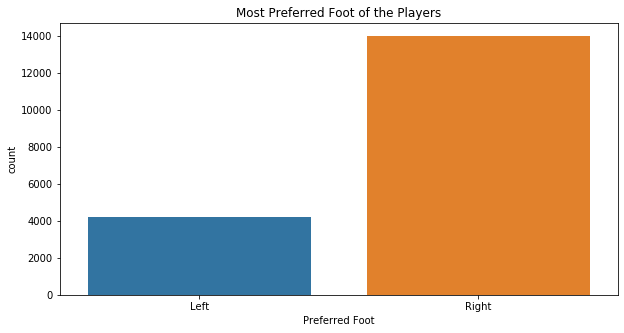

In [22]:
plt.figure(figsize=(10,5))
sns.countplot(data['Preferred Foot'])
plt.title('Most Preferred Foot of the Players')

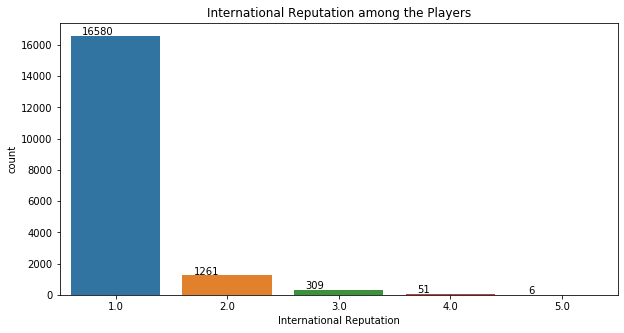

In [23]:
plt.figure(figsize=(10,5))
ax = sns.countplot(data['International Reputation'])
plt.title('International Reputation among the Players')
for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

Text(0.5, 1.0, 'Distribution of Weak Foot among the Players')

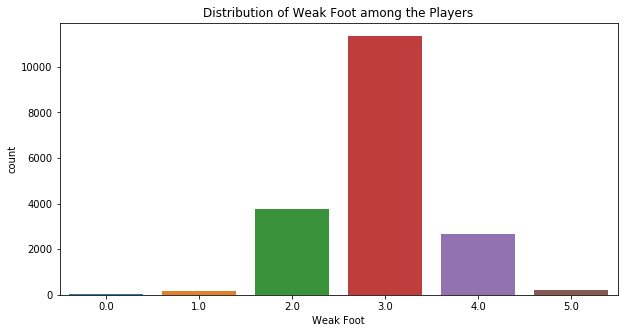

In [24]:
plt.figure(figsize=(10,5))
sns.countplot(data['Weak Foot'])
plt.title('Distribution of Weak Foot among the Players')

Text(0.5, 1.0, 'Positions of Players')

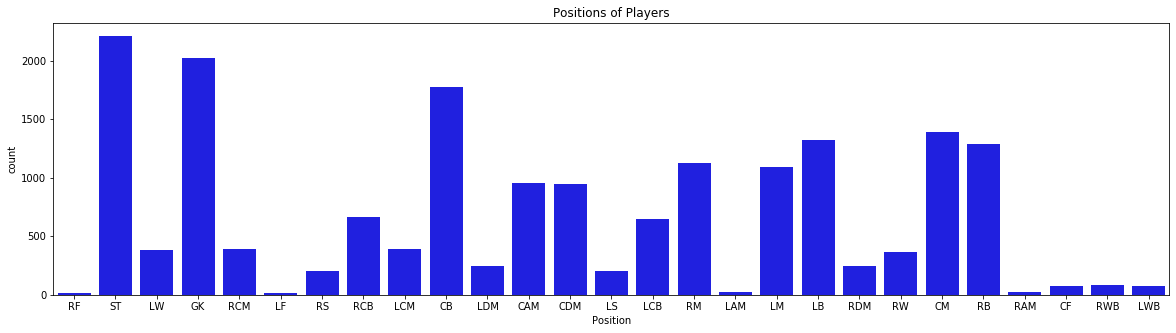

In [25]:
plt.figure(figsize=(20,5))
sns.countplot(data['Position'],color='blue')
plt.title('Positions of Players')

(array([-100.,    0.,  100.,  200.,  300.,  400.,  500.,  600.]),
 <a list of 8 Text xticklabel objects>)

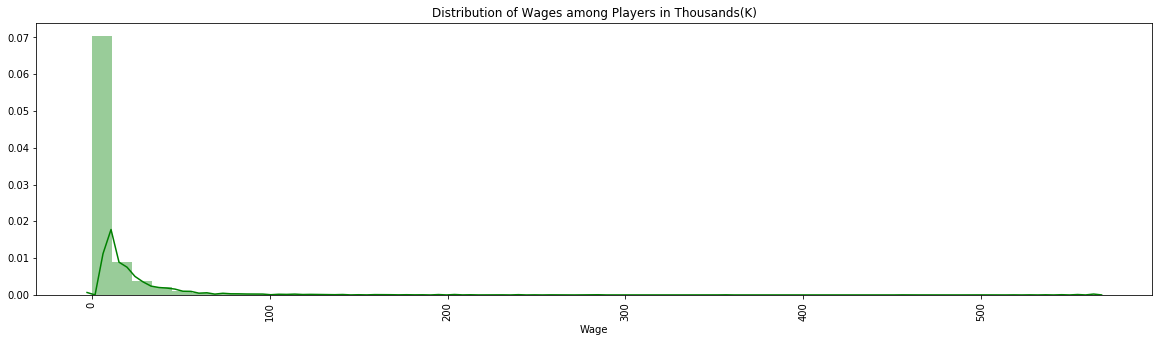

In [26]:
plt.figure(figsize=(20,5))
sns.distplot(data['Wage'],color='green')
plt.title('Distribution of Wages among Players in Thousands(K)')
plt.xticks(rotation=90)

([<matplotlib.patches.Wedge at 0x13b0ba89788>,
 [Text(-0.19386282956124623, 1.0827821587533235, '4.0'),
  Text(-0.36626161095793414, -1.0372330655828994, '5.0'),
  Text(1.003571556461977, -0.4503822055326842, '1.0'),
  Text(1.095937333812787, 0.09445295313181103, '3.0'),
  Text(1.0649826435931802, 0.2753397335025978, '2.0')],
 [Text(-0.10574336157886156, 0.5906084502290855, '47.3%'),
  Text(-0.19977906052250952, -0.565763490317945, '36.2%'),
  Text(0.5474026671610783, -0.2456630211996459, '11.1%'),
  Text(0.5977840002615201, 0.05151979261735146, '5.0%'),
  Text(0.5808996237780982, 0.15018530918323517, '0.3%')])

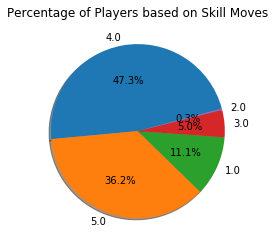

In [27]:
'''plt.figure(figsize=(10,5))
ax = sns.countplot(data['Skill Moves'])
plt.title('Count of Players based on Skill Moves')
for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))'''
plt.title('Percentage of Players based on Skill Moves')       
skillmoves = data['Skill Moves'].unique()
count = data['Skill Moves'].value_counts()
plt.pie(count, labels=skillmoves, autopct='%1.1f%%', startangle=15, shadow = True)

Text(0.5, 1.0, 'Distribution of Height among Players in cm')

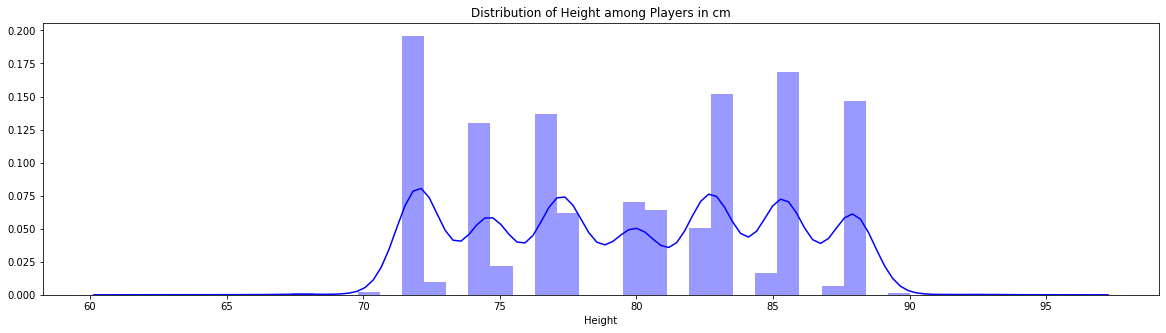

In [28]:
plt.figure(figsize=(20,5))
sns.distplot(data['Height'],color='blue')
plt.title('Distribution of Height among Players in cm')

(array([ 80., 100., 120., 140., 160., 180., 200., 220., 240., 260.]),
 <a list of 10 Text xticklabel objects>)

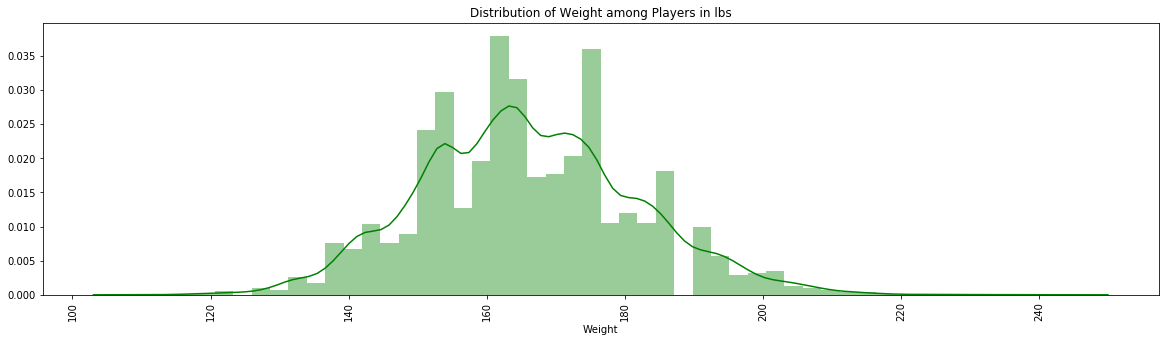

In [29]:
plt.figure(figsize=(20,5))
sns.distplot(data['Weight'],color='green')
plt.title('Distribution of Weight among Players in lbs')
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

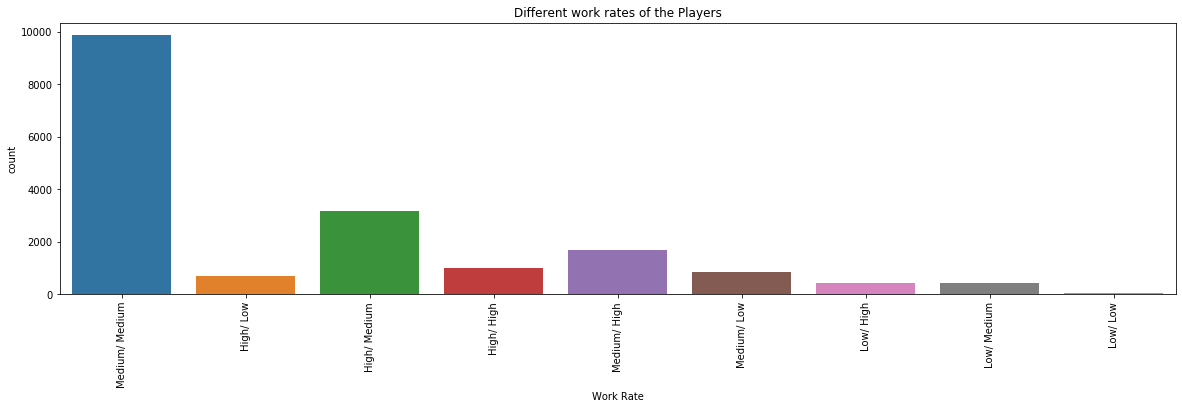

In [30]:
plt.figure(figsize=(20,5))
sns.countplot(data['Work Rate'])
plt.title('Different work rates of the Players')
plt.xticks(rotation=90)

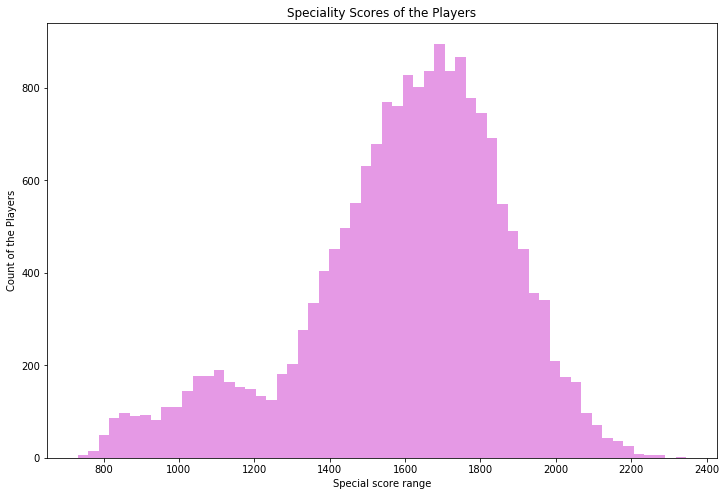

In [31]:
x = data.Special
plt.figure(figsize = (12, 8))
ax = sns.distplot(x, bins = 58, kde = False, color = 'm')
ax.set_xlabel(xlabel = 'Special score range')
ax.set_ylabel(ylabel = 'Count of the Players')
ax.set_title(label = 'Speciality Scores of the Players')
plt.style.use('tableau-colorblind10')
plt.show()

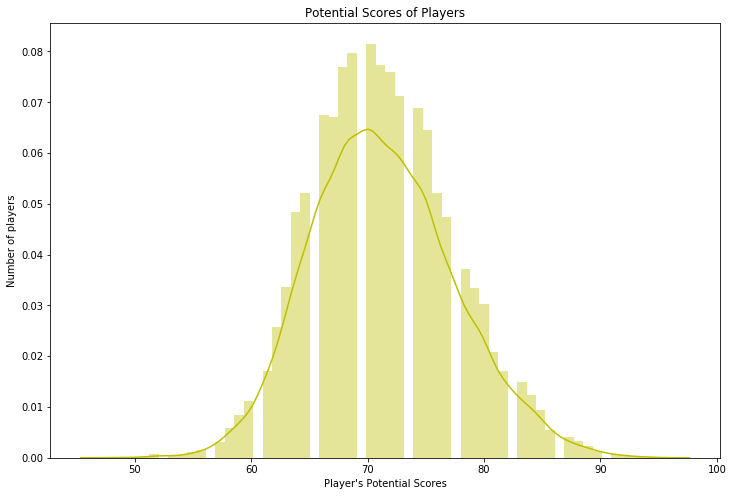

In [32]:
x = data.Potential
plt.figure(figsize=(12,8))
ax = sns.distplot(x, bins = 58, kde = True, color = 'y')
ax.set_xlabel(xlabel = "Player\'s Potential Scores")
ax.set_ylabel(ylabel = 'Number of players')
ax.set_title(label = 'Potential Scores of Players')
plt.show()

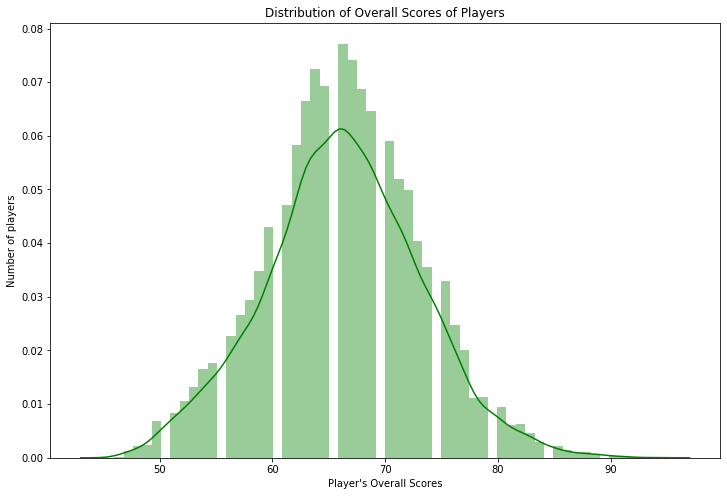

In [33]:
x = data.Overall
plt.figure(figsize=(12,8))
ax = sns.distplot(x, bins = 58, kde = True, color = 'g')
ax.set_xlabel(xlabel = "Player\'s Overall Scores")
ax.set_ylabel(ylabel = 'Number of players')
ax.set_title(label = 'Distribution of Overall Scores of Players')
plt.show()

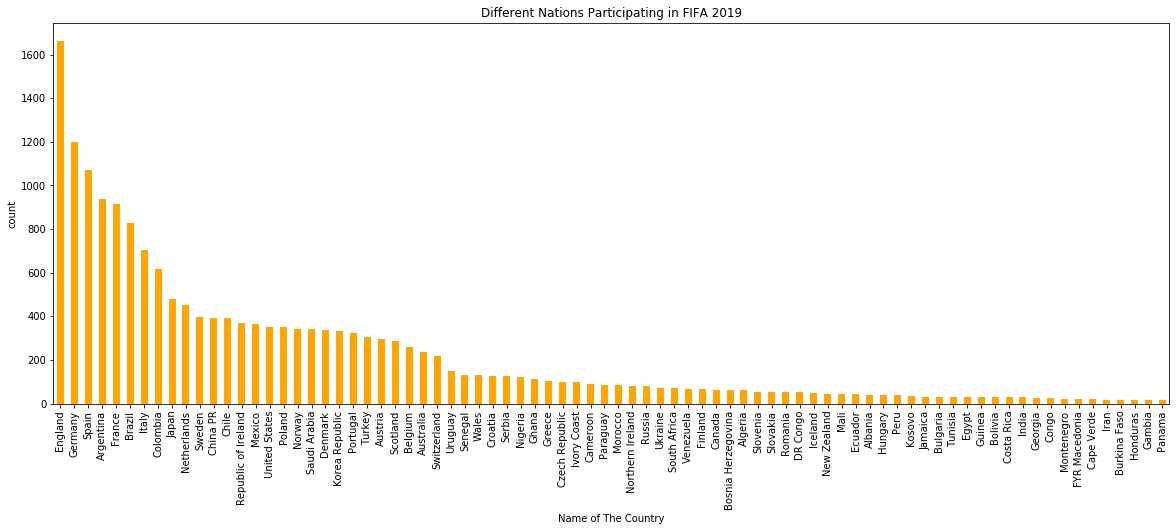

In [34]:
data['Nationality'].value_counts().head(80).plot.bar(color = 'orange', figsize = (20, 7))
plt.title('Different Nations Participating in FIFA 2019')
plt.xlabel('Name of The Country')
plt.ylabel('count')
plt.show()

Text(0.5, 1.0, 'Distribution of Age of Players')

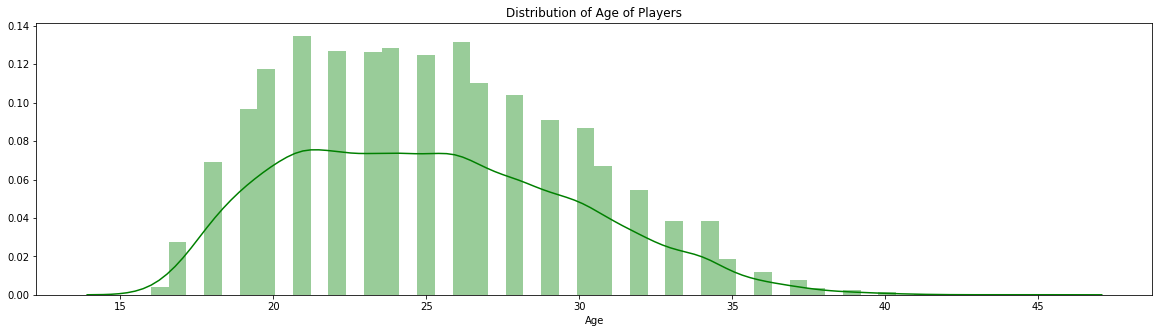

In [35]:
plt.figure(figsize=(20,5))
sns.distplot(data['Age'],color='green')
plt.title('Distribution of Age of Players')

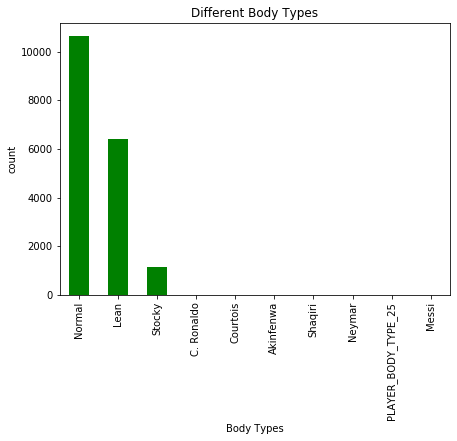

In [36]:
data['Body Type'].value_counts().plot.bar(color = 'green', figsize = (7, 5))
plt.title('Different Body Types')
plt.xlabel('Body Types')
plt.ylabel('count')
plt.show()

#### Best Players per each position with their age, club, and nationality based on their Overall Scores

In [37]:
data.iloc[data.groupby(data['Position'])['Overall'].idxmax()][['Position', 'Name','ID', 'Age', 'Club', 'Nationality']]

,Position,Name,ID,Age,Club,Nationality
17,CAM,A. Griezmann,194765,27,Atlético Madrid,France
12,CB,D. Godín,182493,32,Atlético Madrid,Uruguay
20,CDM,Sergio Busquets,189511,29,FC Barcelona,Spain
271,CF,Luis Alberto,198706,25,Lazio,Spain
67,CM,Thiago,189509,27,FC Bayern München,Spain
3,GK,De Gea,193080,27,Manchester United,Spain
28,LAM,J. Rodríguez,198710,26,FC Bayern München,Colombia
35,LB,Marcelo,176676,30,Real Madrid,Brazil
24,LCB,G. Chiellini,138956,33,Juventus,Italy
11,LCM,T. Kroos,182521,28,Real Madrid,Germany


#### Best Players from each positions with their age, nationality, club based on their Potential Scores

In [38]:
data.iloc[data.groupby(data['Position'])['Potential'].idxmax()][['Position', 'Name', 'Age','ID', 'Club', 'Nationality']]

,Position,Name,Age,ID,Club,Nationality
31,CAM,C. Eriksen,26,190460,Tottenham Hotspur,Denmark
42,CB,S. Umtiti,24,205600,FC Barcelona,France
27,CDM,Casemiro,26,200145,Real Madrid,Brazil
350,CF,A. Milik,24,205175,Napoli,Poland
78,CM,S. Milinković-Savić,23,223848,Lazio,Serbia
3,GK,De Gea,27,193080,Manchester United,Spain
28,LAM,J. Rodríguez,26,198710,FC Bayern München,Colombia
35,LB,Marcelo,30,176676,Real Madrid,Brazil
77,LCB,M. Škriniar,23,232363,Inter,Slovakia
11,LCM,T. Kroos,28,182521,Real Madrid,Germany


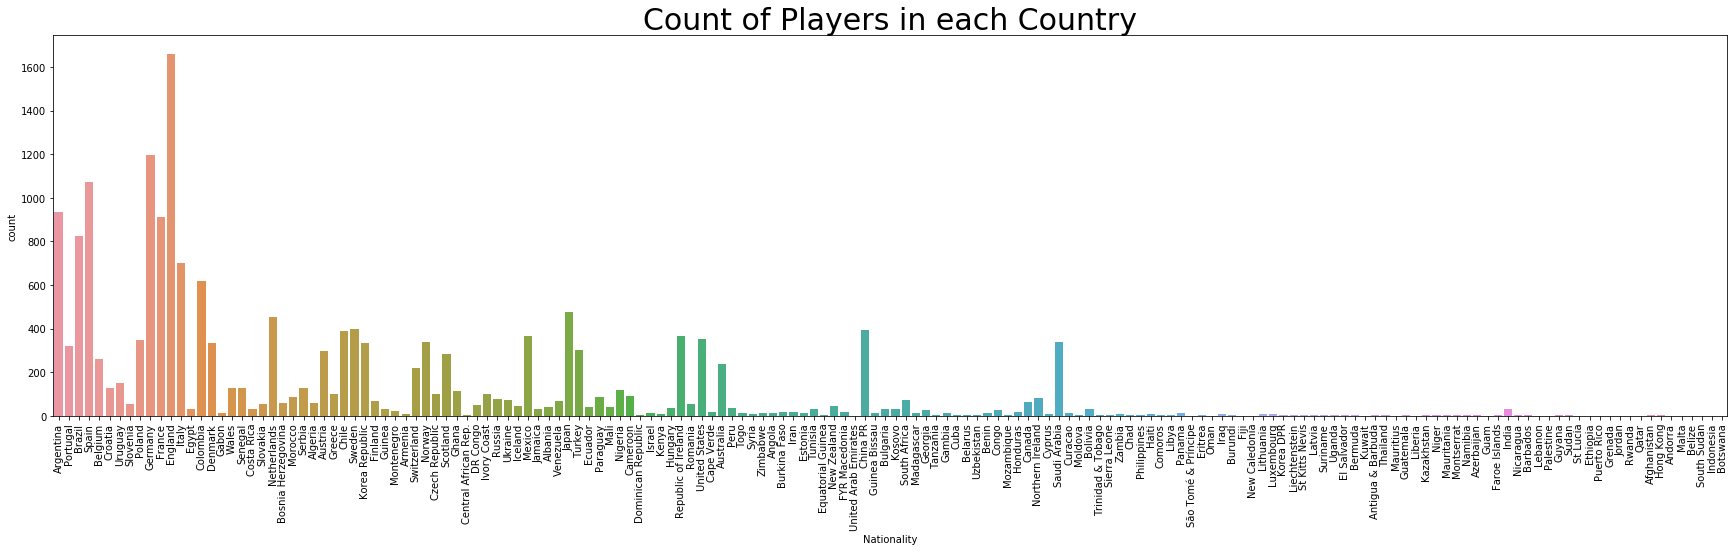

In [39]:
plt.figure(figsize=(30,7))
sns.countplot(data['Nationality'])
plt.xticks(rotation=90)
plt.title('Count of Players in each Country',fontsize=30)
plt.show()

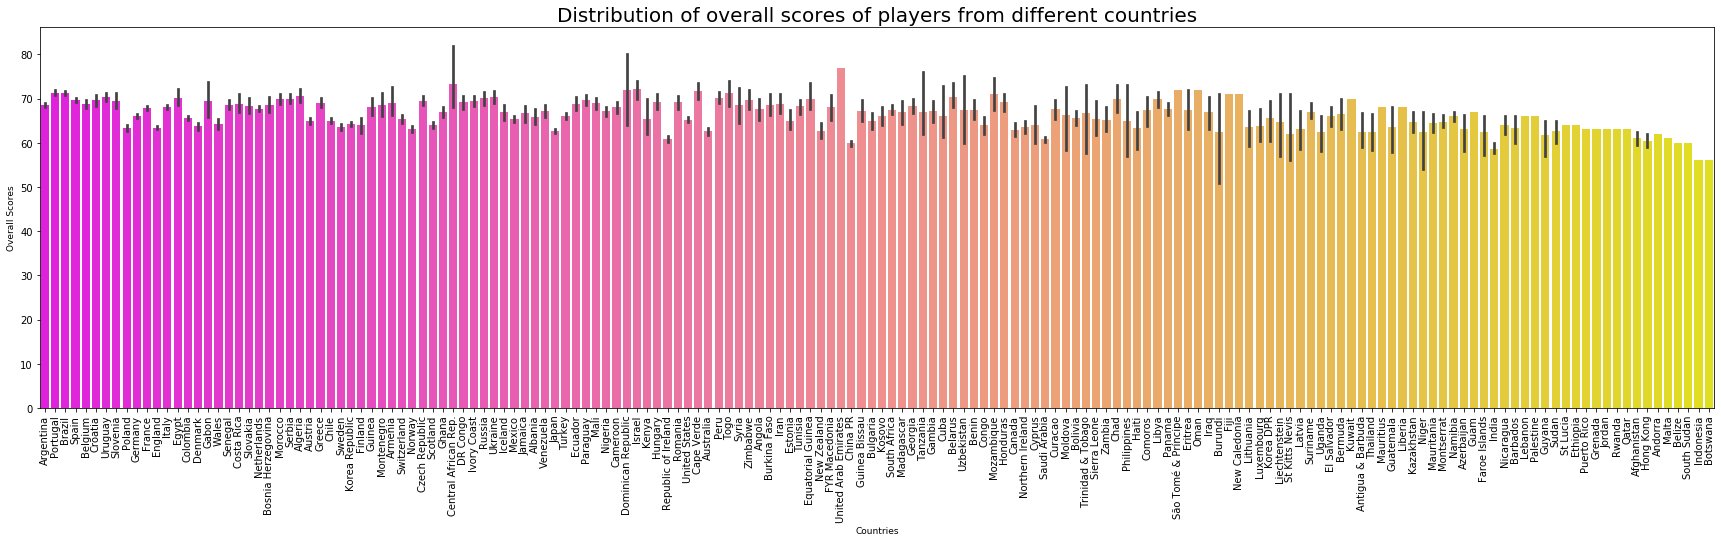

In [40]:
plt.rcParams['figure.figsize'] = (30, 7)
ax = sns.barplot(x = data['Nationality'], y = data['Overall'], palette = 'spring')
ax.set_xlabel(xlabel = 'Countries', fontsize = 9)
ax.set_ylabel(ylabel = 'Overall Scores', fontsize = 9)
ax.set_title(label = 'Distribution of overall scores of players from different countries', fontsize = 20)
plt.xticks(rotation=90)
plt.show()

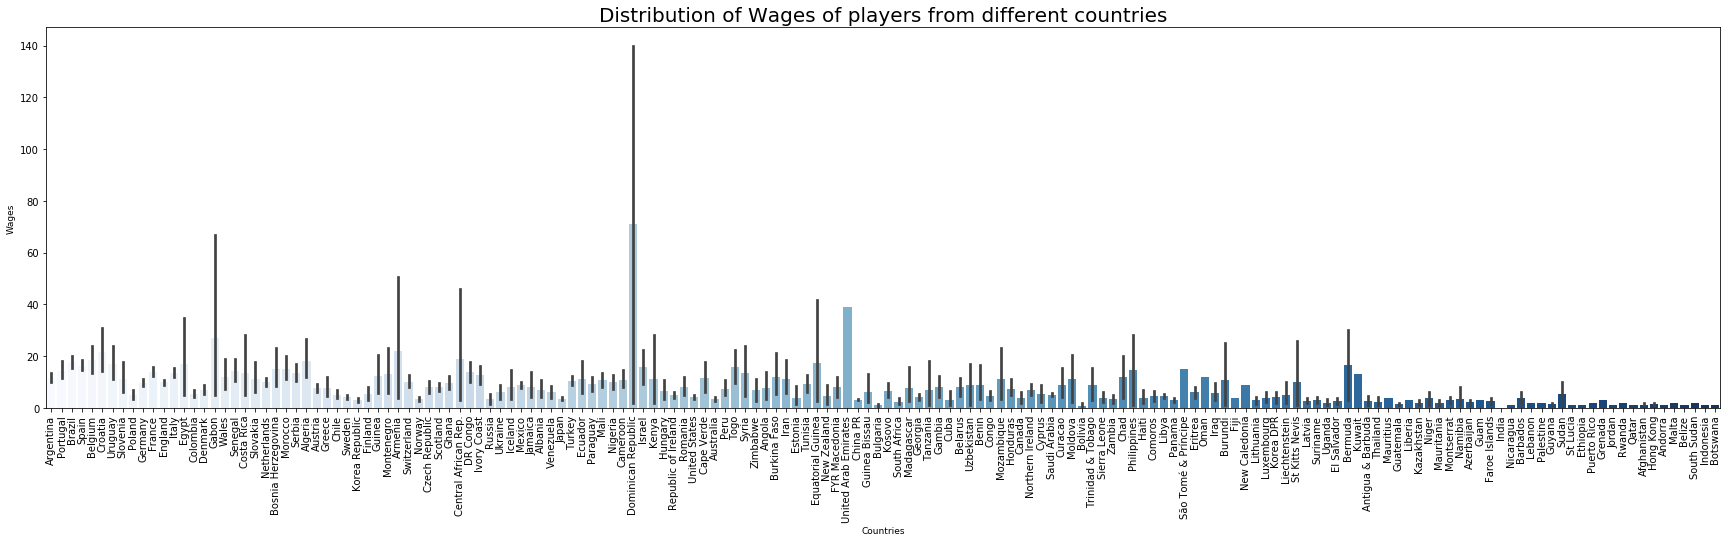

In [41]:
plt.rcParams['figure.figsize'] = (30, 7)
ax = sns.barplot(x = data['Nationality'], y = data['Wage'], palette = 'Blues')
ax.set_xlabel(xlabel = 'Countries', fontsize = 9)
ax.set_ylabel(ylabel = 'Wages', fontsize = 9)
ax.set_title(label = 'Distribution of Wages of players from different countries', fontsize = 20)
plt.xticks(rotation=90)
plt.show()

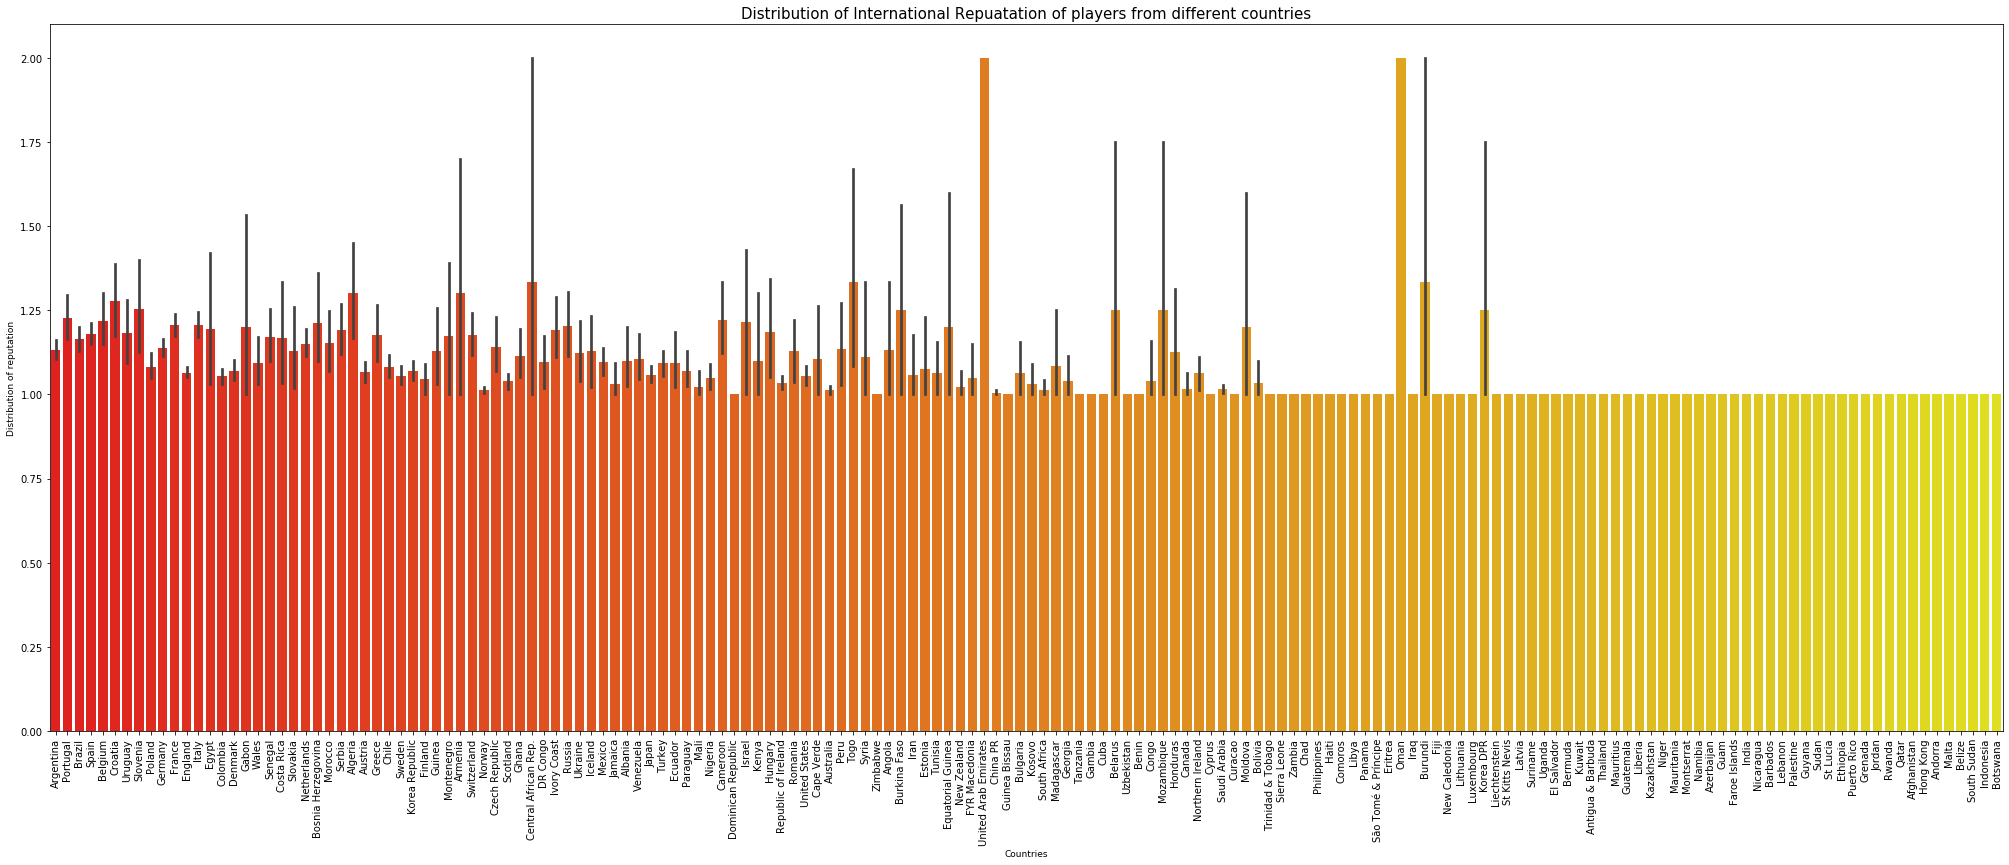

In [42]:
plt.rcParams['figure.figsize'] = (35, 13)
ax = sns.barplot(x = data['Nationality'], y = data['International Reputation'], palette = 'autumn')
ax.set_xlabel(xlabel = 'Countries', fontsize = 9)
ax.set_ylabel(ylabel = 'Distribution of reputation', fontsize = 9)
ax.set_title(label = 'Distribution of International Repuatation of players from different countries', fontsize = 15)
plt.xticks(rotation=90)
plt.show()

In [43]:
data['Club'].value_counts().head(11)

No Club                    241
Newcastle United            33
TSG 1899 Hoffenheim         33
Wolverhampton Wanderers     33
Fortuna Düsseldorf          33
Manchester United           33
Rayo Vallecano              33
Tottenham Hotspur           33
Atlético Madrid             33
Eintracht Frankfurt         33
Borussia Dortmund           33
Name: Club, dtype: int64

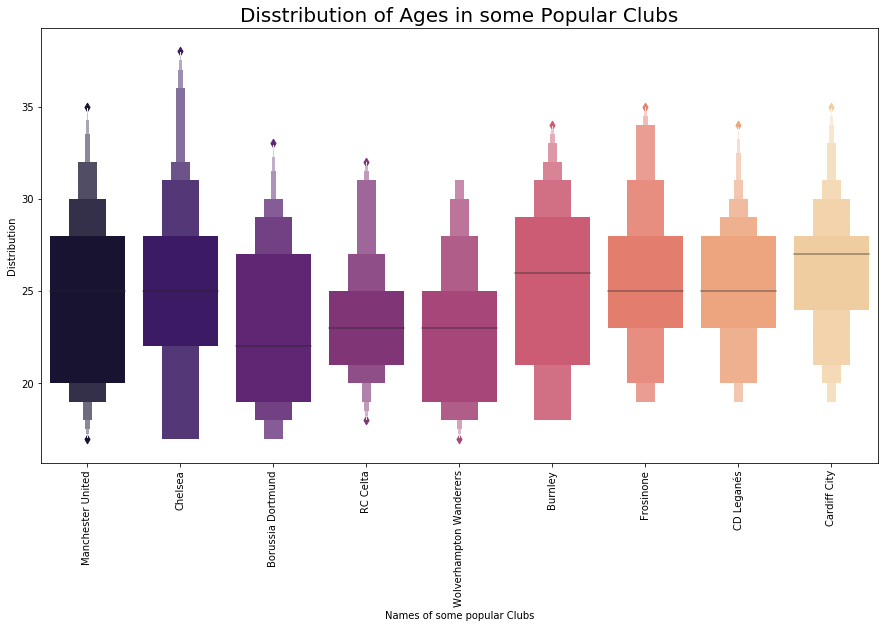

In [44]:
popular_clubs = ('CD Leganés', 'Manchester United', 'RC Celta', 'Borussia Dortmund', 'Burnley', 'Manchestar City',
             'Cardiff City', 'Wolverhampton Wanderers', 'Frosinone', 'Chelsea')

data_club = data.loc[data['Club'].isin(popular_clubs) & data['Wage']]

plt.rcParams['figure.figsize'] = (15, 8)
ax = sns.boxenplot(x = 'Club', y = 'Age', data = data_club, palette = 'magma')
ax.set_xlabel(xlabel = 'Names of some popular Clubs', fontsize = 10)
ax.set_ylabel(ylabel = 'Distribution', fontsize = 10)
ax.set_title(label = 'Disstribution of Ages in some Popular Clubs', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

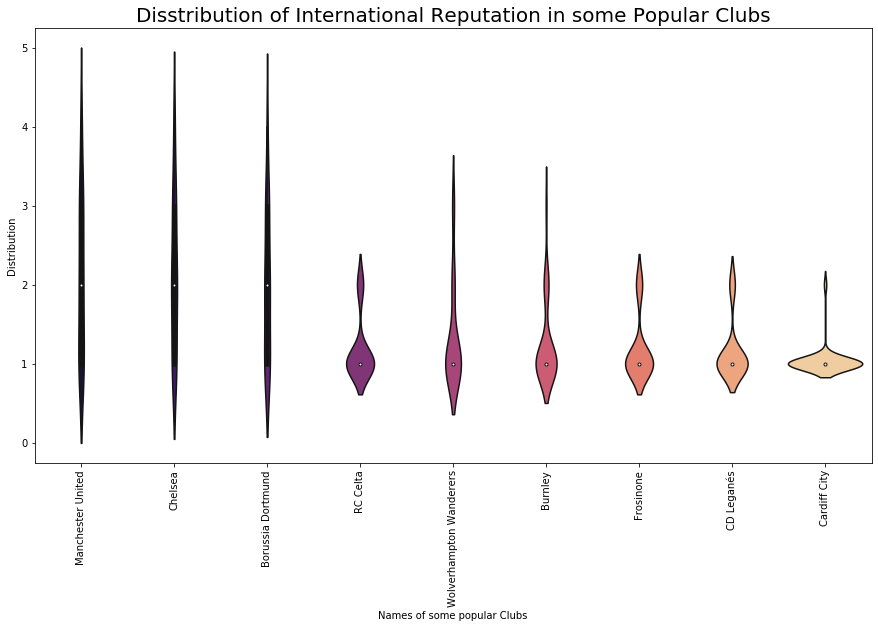

In [45]:
popular_clubs = ('CD Leganés', 'Manchester United', 'RC Celta', 'Borussia Dortmund', 'Burnley', 'Manchestar City',
             'Cardiff City', 'Wolverhampton Wanderers', 'Frosinone', 'Chelsea')

data_club = data.loc[data['Club'].isin(popular_clubs) & data['International Reputation']]

plt.rcParams['figure.figsize'] = (15, 8)
ax = sns.violinplot(x = 'Club', y = 'International Reputation', data = data_club, palette = 'magma')
ax.set_xlabel(xlabel = 'Names of some popular Clubs', fontsize = 10)
ax.set_ylabel(ylabel = 'Distribution', fontsize = 10)
ax.set_title(label = 'Disstribution of International Reputation in some Popular Clubs', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

#### 10 Youngest Players of FIFA 19

In [46]:
data.sort_values('Age', ascending = True)[['Name', 'Age','ID', 'Club', 'Nationality']].head(10)

,Name,Age,ID,Club,Nationality
18206,G. Nugent,16,246269,Tranmere Rovers,England
17743,J. Olstad,16,244752,Sarpsborg 08 FF,Norway
13293,H. Massengo,16,246594,AS Monaco,France
16081,J. Italiano,16,241552,Perth Glory,Australia
18166,N. Ayéva,16,243621,Örebro SK,Sweden
17712,K. Broda,16,245470,Wisła Kraków,Poland
17354,L. D'Arrigo,16,242240,Adelaide United,Australia
13567,Y. Verschaeren,16,246419,RSC Anderlecht,Belgium
16927,B. Nygren,16,243646,IFK Göteborg,Sweden
18018,B. O'Gorman,16,243722,Bray Wanderers,Republic of Ireland


#### 10 Eldest Players of FIFA 19

In [47]:
data.sort_values('Age', ascending = False)[['Name', 'Age','ID', 'Club', 'Nationality']].head(10)

,Name,Age,ID,Club,Nationality
4741,O. Pérez,45,140029,Pachuca,Mexico
18183,K. Pilkington,44,53748,Cambridge United,England
17726,T. Warner,44,51963,Accrington Stanley,Trinidad & Tobago
10545,S. Narazaki,42,140183,Nagoya Grampus,Japan
7225,C. Muñoz,41,142998,CD Universidad de Concepción,Argentina
1120,J. Villar,41,156092,No Club,Paraguay
12192,H. Sulaimani,41,208927,Ohod Club,Saudi Arabia
15426,M. Tyler,41,18745,Peterborough United,England
4228,B. Nivet,41,3665,ESTAC Troyes,France
10356,F. Kippe,40,49511,Lillestrøm SK,Norway


#### Longest Memberships in the Club

In [48]:
import datetime

now = datetime.datetime.now()
data['Join_year'] = data.Joined.dropna().map(lambda x: x.split(',')[1].split(' ')[1])
data['Years_of_member'] = (data.Join_year.dropna().map(lambda x: now.year - int(x))).astype('int')
membership = data[['Name', 'Club', 'Years_of_member']].sort_values(by = 'Years_of_member', ascending = False).head(10)
membership.set_index('Name', inplace=True)
membership

,Club,Years_of_member
Name,,
O. Pérez,Pachuca,30
M. Al Shalhoub,Al Hilal,23
H. Sogahata,Kashima Antlers,23
M. Ogasawara,Kashima Antlers,23
S. Narazaki,Nagoya Grampus,22
M. Wölfli,BSC Young Boys,21
K. Kitamoto,Vissel Kobe,21
C. Källqvist,BK Häcken,20
Y. Endo,Gamba Osaka,20


#### Defining the features of Players

In [49]:
player_features = ('Acceleration', 'Aggression', 'Agility', 
                   'Balance', 'BallControl', 'Composure', 
                   'Crossing', 'Dribbling', 'FKAccuracy', 
                   'Finishing', 'GKDiving', 'GKHandling', 
                   'GKKicking', 'GKPositioning', 'GKReflexes', 
                   'HeadingAccuracy', 'Interceptions', 'Jumping', 
                   'LongPassing', 'LongShots', 'Marking', 'Penalties')

# Top four features for every position in football

for i, val in data.groupby(data['Position'])[player_features].mean().iterrows():
    print('Position {}: {}, {}, {}'.format(i, *tuple(val.nlargest(4).index)))

Position CAM: Balance, Agility, Acceleration
Position CB: Jumping, Aggression, HeadingAccuracy
Position CDM: Aggression, Jumping, Balance
Position CF: Agility, Balance, Acceleration
Position CM: Balance, Agility, Acceleration
Position GK: GKReflexes, GKDiving, GKPositioning
Position LAM: Agility, Balance, Acceleration
Position LB: Acceleration, Balance, Agility
Position LCB: Jumping, Aggression, HeadingAccuracy
Position LCM: Balance, Agility, BallControl
Position LDM: Aggression, BallControl, LongPassing
Position LF: Balance, Agility, Acceleration
Position LM: Acceleration, Agility, Balance
Position LS: Acceleration, Agility, Finishing
Position LW: Acceleration, Agility, Balance
Position LWB: Acceleration, Agility, Balance
Position RAM: Agility, Balance, Acceleration
Position RB: Acceleration, Balance, Jumping
Position RCB: Jumping, Aggression, HeadingAccuracy
Position RCM: Agility, Balance, BallControl
Position RDM: Aggression, Jumping, BallControl
Position RF: Agility, Acceleration, 

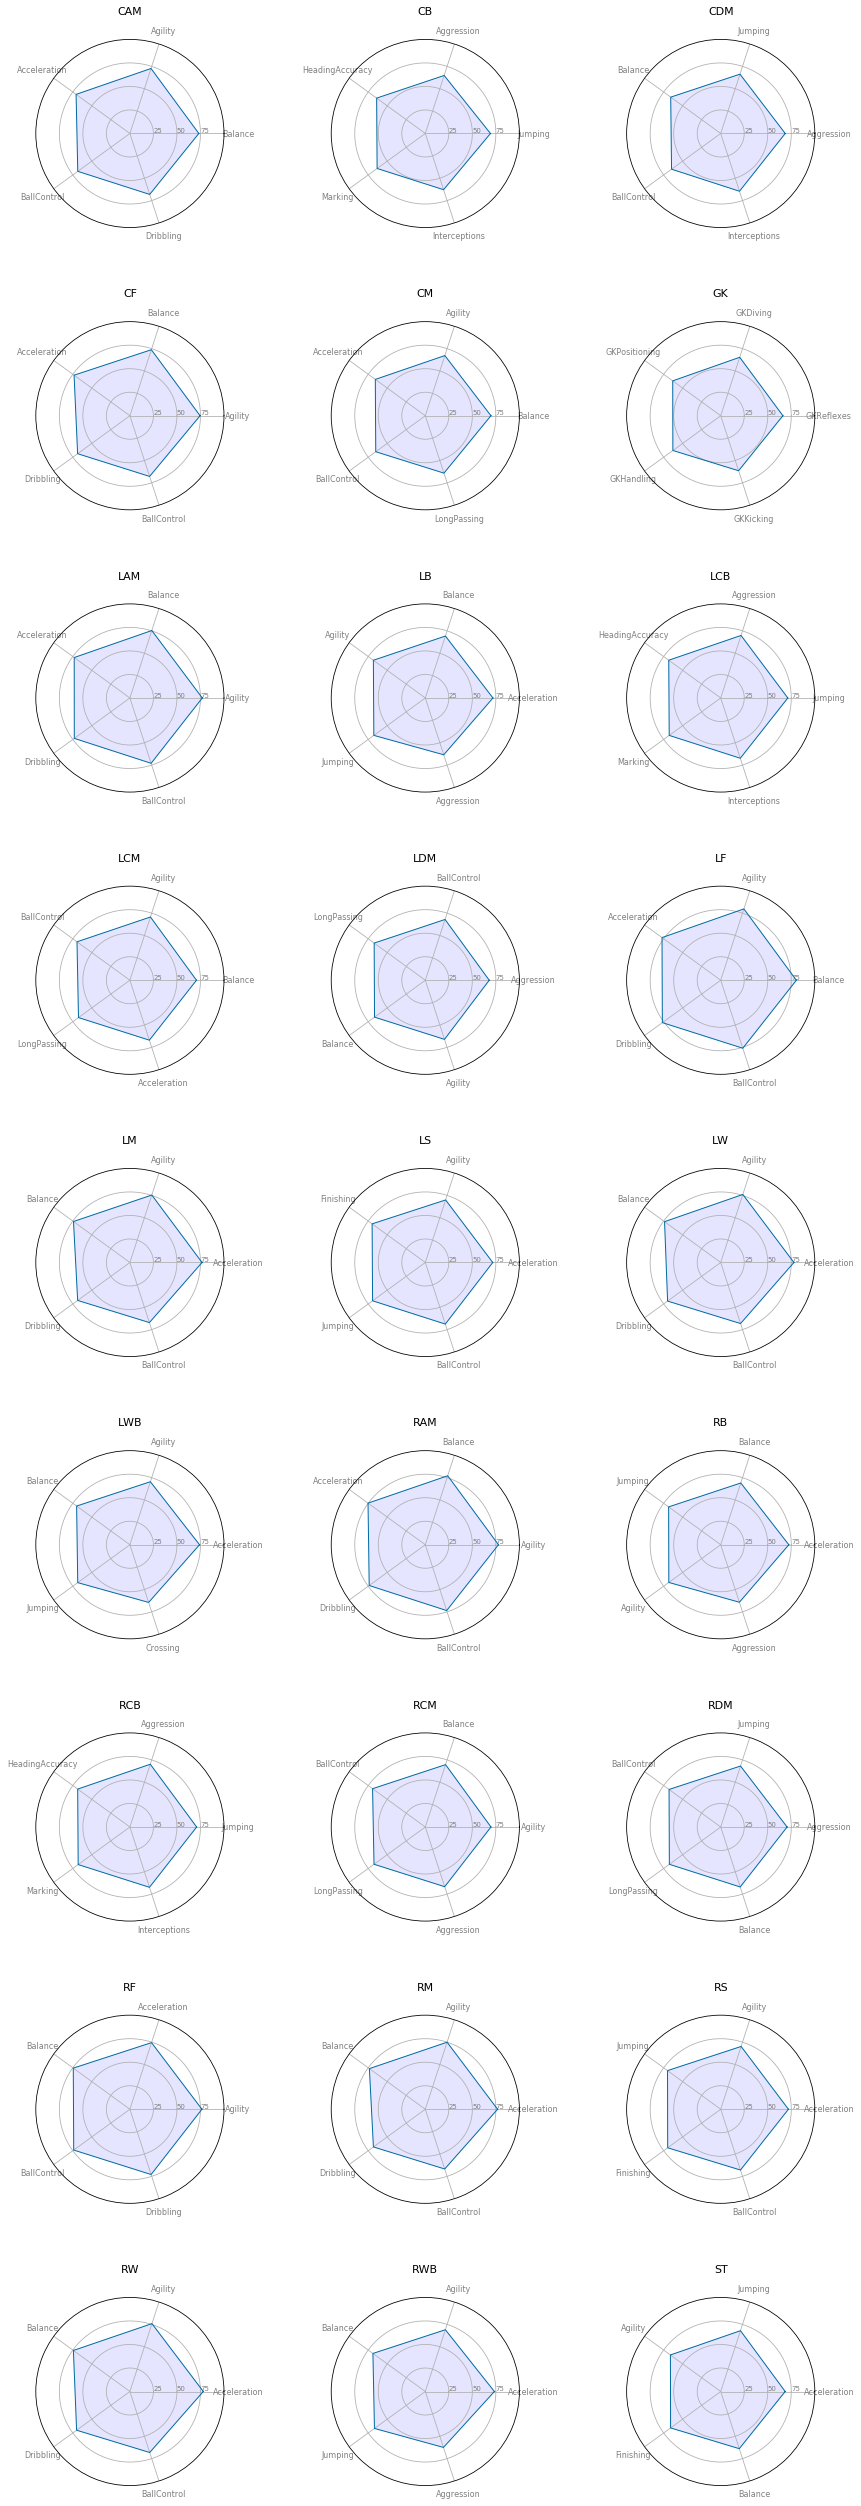

In [50]:
from math import pi

idx = 1
plt.figure(figsize=(15,45))
for position_name, features in data.groupby(data['Position'])[player_features].mean().iterrows():
    top_features = dict(features.nlargest(5))
    
    # number of variable
    categories=top_features.keys()
    N = len(categories)

    # We are going to plot the first line of the data frame.
    # But we need to repeat the first value to close the circular graph:
    values = list(top_features.values())
    values += values[:1]

    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    # Initialise the spider plot
    ax = plt.subplot(9, 3, idx, polar=True)

    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories, color='grey', size=8)

    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks([25,50,75], ["25","50","75"], color="grey", size=7)
    plt.ylim(0,100)
    
    plt.subplots_adjust(hspace = 0.5)
    
    # Plot data
    ax.plot(angles, values, linewidth=1, linestyle='solid')

    # Fill area
    ax.fill(angles, values, 'b', alpha=0.1)
    
    plt.title(position_name, size=11, y=1.1)
    
    idx += 1 

#### Function to check the Player's Details

In [52]:
def playerdata(x):
    return data.loc[x,:]

n = int(input())
x = playerdata(n)  
pd.set_option('display.max_rows', 200)
x = pd.DataFrame(x)
print(x)

5
                                                                       5
ID                                                                183277
Name                                                           E. Hazard
Age                                                                   27
Photo                     https://cdn.sofifa.org/players/4/19/183277.png
Nationality                                                      Belgium
Flag                                  https://cdn.sofifa.org/flags/7.png
Overall                                                               91
Potential                                                             91
Club                                                             Chelsea
Club Logo                     https://cdn.sofifa.org/teams/2/light/5.png
Value                                                              172.1
Wage                                                                 340
Special                                          

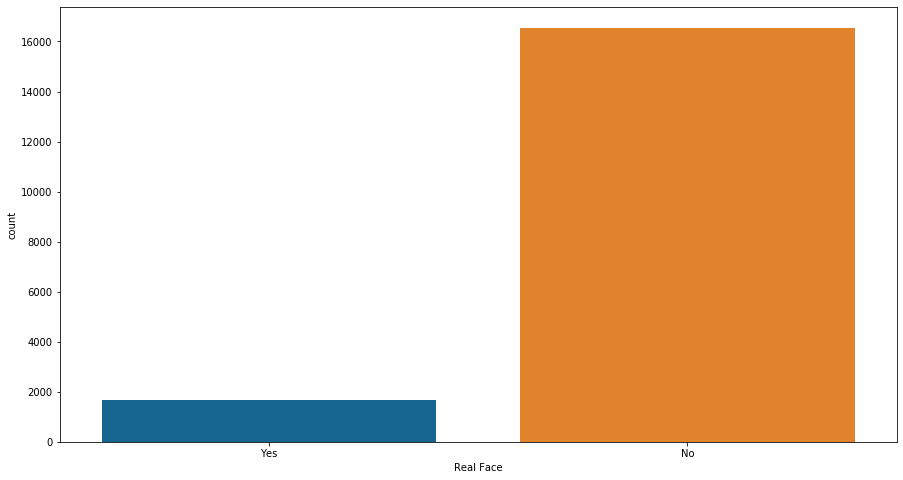

In [53]:
sns.countplot(data['Real Face'])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]),
 <a list of 100 Text xticklabel objects>)

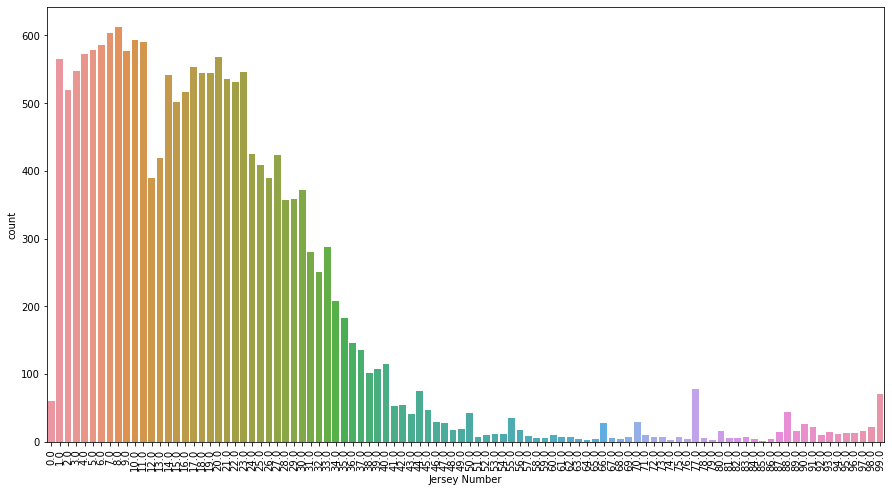

In [54]:
sns.countplot(data['Jersey Number'])
plt.xticks(rotation=90)

Text(0.5, 1.0, 'Overall vs Potential')

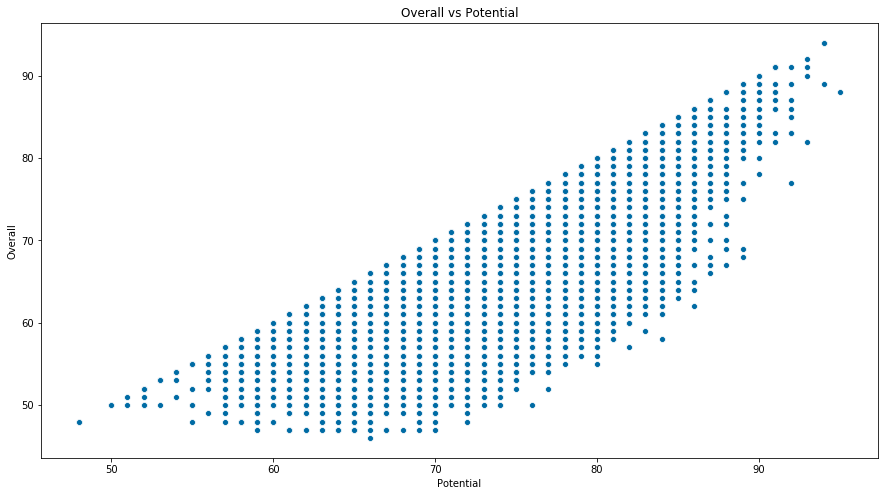

In [55]:
sns.scatterplot(data['Potential'],data['Overall'])
plt.title('Overall vs Potential')

Text(0.5, 1.0, 'Age vs Potential')

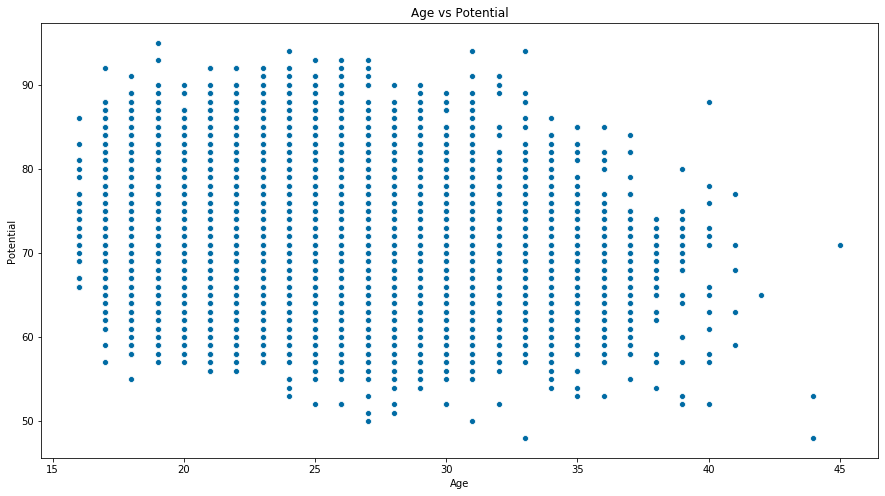

In [56]:
sns.scatterplot(data['Age'],data['Potential'])
plt.title('Age vs Potential')

Text(0.5, 1.0, 'Players vs Their Contracts')

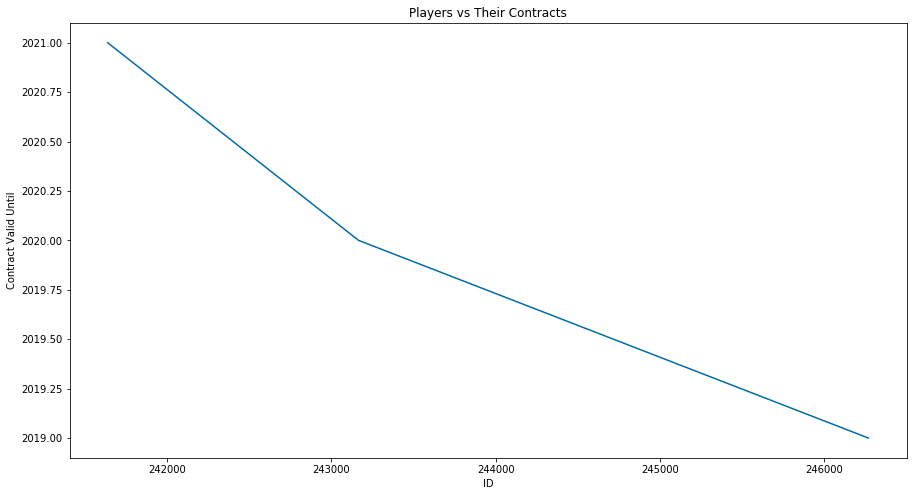

In [57]:
y = data['Contract Valid Until'][-4:].astype(int)
sns.lineplot(data['ID'],y)
plt.title('Players vs Their Contracts')

## K-Means Clustering

We use only integer and float columns.

In [58]:
#drop non-numeric columns
df = data.drop(columns=['ID', 'Name', 'Photo', 'Nationality', 'Flag', 'Club','Club Logo','Value','Wage','Preferred Foot','Work Rate',
                       'Body Type','Real Face','Position','Release Clause', 'Joined', 'Loaned From','Contract Valid Until','Height',
                       'Weight','LS','ST','RS','LW','LF','CF','RF','RW','LAM','CAM','RAM','LM','LCM','CM','RCM','RM','LWB','LDM','CDM',
                       'RDM','RWB','LB','LCB','CB','RCB','RB','Join_year','Years_of_member'])

In [59]:
df.head()

,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,Crossing,Finishing,...,GKPositioning,GKReflexes,Defending,General,Mental,Passing,Mobility,Power,Rating,Shooting
0,31,94,94,2202,5.0,4.0,4.0,10.0,84.0,95.0,...,14.0,8.0,29,89,71,87,91,74,94,88
1,33,94,94,2228,5.0,4.0,5.0,7.0,84.0,94.0,...,14.0,11.0,27,88,73,81,91,83,94,88
2,26,92,93,2143,5.0,5.0,5.0,10.0,79.0,87.0,...,15.0,11.0,28,85,72,80,94,69,92,84
3,27,91,93,1471,4.0,3.0,1.0,1.0,17.0,13.0,...,88.0,94.0,16,26,43,39,66,54,92,21
4,27,91,92,2281,4.0,5.0,4.0,7.0,93.0,82.0,...,10.0,13.0,59,79,81,92,81,76,92,85


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 50 columns):
Age                         18207 non-null int64
Overall                     18207 non-null int64
Potential                   18207 non-null int64
Special                     18207 non-null int64
International Reputation    18207 non-null float64
Weak Foot                   18207 non-null float64
Skill Moves                 18207 non-null float64
Jersey Number               18207 non-null float64
Crossing                    18207 non-null float64
Finishing                   18207 non-null float64
HeadingAccuracy             18207 non-null float64
ShortPassing                18207 non-null float64
Volleys                     18207 non-null float64
Dribbling                   18207 non-null float64
Curve                       18207 non-null float64
FKAccuracy                  18207 non-null float64
LongPassing                 18207 non-null float64
BallControl                 1820

#### Task 2 - K Means

In [61]:
from sklearn.cluster import KMeans
# building K-Means model with 3 clusters
model = KMeans(n_clusters=3)
model.fit(df)
# Take a look at the cluster labels that are generated
print(np.unique(model.labels_))

[0 1 2]


In [62]:
# cluster1 variable holds the data that has been grouped into the first cluster
cluster1 = df[model.labels_==0]
cluster1

,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,Crossing,Finishing,...,GKPositioning,GKReflexes,Defending,General,Mental,Passing,Mobility,Power,Rating,Shooting
3,27,91,93,1471,4.0,3.0,1.0,1.0,17.0,13.0,...,88.0,94.0,16,26,43,39,66,54,92,21
22,32,89,89,1473,5.0,4.0,1.0,1.0,15.0,13.0,...,87.0,87.0,13,29,42,43,62,59,89,20
37,31,88,88,1335,4.0,1.0,1.0,1.0,13.0,10.0,...,83.0,92.0,19,16,33,38,67,53,88,18
44,27,87,90,1660,3.0,3.0,2.0,26.0,30.0,19.0,...,13.0,5.0,88,59,64,51,68,72,88,27
46,31,87,87,1345,3.0,3.0,1.0,1.0,11.0,15.0,...,82.0,90.0,19,14,41,26,63,62,87,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18196,19,47,61,1333,1.0,3.0,2.0,26.0,31.0,28.0,...,11.0,8.0,46,43,43,44,56,57,54,35
18197,18,47,61,1362,1.0,3.0,2.0,14.0,44.0,44.0,...,10.0,15.0,42,46,41,50,57,51,54,45
18199,18,47,69,1303,1.0,3.0,2.0,65.0,31.0,31.0,...,14.0,15.0,49,42,43,46,56,49,58,34
18202,19,47,65,1307,1.0,2.0,2.0,22.0,34.0,38.0,...,8.0,9.0,45,39,46,43,55,54,56,37


In [63]:
cluster3 = df[model.labels_==2]
cluster3

,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,Crossing,Finishing,...,GKPositioning,GKReflexes,Defending,General,Mental,Passing,Mobility,Power,Rating,Shooting
9,25,90,93,1331,3.0,3.0,1.0,1.0,13.0,11.0,...,88.0,89.0,19,14,41,23,64,61,92,14
18,26,89,92,1328,3.0,4.0,1.0,22.0,15.0,14.0,...,85.0,90.0,16,16,43,31,52,59,90,16
19,26,89,90,1311,4.0,2.0,1.0,1.0,14.0,14.0,...,86.0,88.0,18,17,32,27,61,55,90,21
40,33,88,88,1262,3.0,2.0,1.0,1.0,12.0,10.0,...,89.0,89.0,16,12,34,27,59,56,88,17
41,40,88,88,1334,4.0,2.0,1.0,1.0,13.0,15.0,...,90.0,83.0,12,22,40,28,56,58,88,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18200,18,47,62,1203,1.0,2.0,2.0,21.0,28.0,47.0,...,12.0,11.0,15,40,35,33,58,55,54,44
18201,18,47,68,1098,1.0,3.0,2.0,29.0,22.0,23.0,...,11.0,13.0,48,30,37,25,46,53,58,28
18203,19,47,63,1098,1.0,2.0,2.0,21.0,23.0,52.0,...,5.0,12.0,19,41,37,30,40,52,55,39
18204,16,47,67,1189,1.0,3.0,2.0,33.0,25.0,40.0,...,6.0,13.0,19,43,36,30,59,51,57,42


In [64]:
cluster2 = df[model.labels_==1]
cluster2

,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,Crossing,Finishing,...,GKPositioning,GKReflexes,Defending,General,Mental,Passing,Mobility,Power,Rating,Shooting
0,31,94,94,2202,5.0,4.0,4.0,10.0,84.0,95.0,...,14.0,8.0,29,89,71,87,91,74,94,88
1,33,94,94,2228,5.0,4.0,5.0,7.0,84.0,94.0,...,14.0,11.0,27,88,73,81,91,83,94,88
2,26,92,93,2143,5.0,5.0,5.0,10.0,79.0,87.0,...,15.0,11.0,28,85,72,80,94,69,92,84
4,27,91,92,2281,4.0,5.0,4.0,7.0,93.0,82.0,...,10.0,13.0,59,79,81,92,81,76,92,85
5,27,91,91,2142,4.0,4.0,4.0,10.0,81.0,84.0,...,8.0,8.0,28,83,72,84,92,75,91,82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15790,28,59,59,1713,1.0,3.0,2.0,66.0,63.0,52.0,...,12.0,11.0,57,54,55,62,62,68,59,59
16059,26,58,60,1687,1.0,3.0,2.0,16.0,57.0,53.0,...,8.0,9.0,52,56,61,57,60,70,59,55
16229,18,58,78,1699,1.0,3.0,2.0,26.0,61.0,52.0,...,7.0,10.0,59,57,57,59,68,60,68,54
16271,23,58,64,1692,1.0,3.0,2.0,34.0,62.0,48.0,...,13.0,10.0,61,57,56,62,67,60,61,52


From the above, we can observe that 3 clusters are formed with each cluster of different size.

In [65]:
from sklearn.cluster import KMeans
# building K-Means model with 5 clusters
model = KMeans(n_clusters=5)
model.fit(df)
# Take a look at the cluster labels that are generated
print(np.unique(model.labels_))

[0 1 2 3 4]


In [66]:
cluster2 = df[model.labels_==1]
cluster2

,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,Crossing,Finishing,...,GKPositioning,GKReflexes,Defending,General,Mental,Passing,Mobility,Power,Rating,Shooting
40,33,88,88,1262,3.0,2.0,1.0,1.0,12.0,10.0,...,89.0,89.0,16,12,34,27,59,56,88,17
128,25,84,89,1254,2.0,3.0,1.0,22.0,11.0,11.0,...,79.0,90.0,17,17,33,25,66,47,86,17
133,28,84,84,1132,2.0,3.0,1.0,1.0,11.0,11.0,...,82.0,88.0,11,13,32,15,52,49,84,14
147,31,84,84,1254,3.0,3.0,1.0,16.0,11.0,11.0,...,85.0,82.0,12,14,37,26,56,60,84,16
177,23,83,91,1223,1.0,4.0,1.0,13.0,25.0,11.0,...,80.0,84.0,18,17,34,31,47,50,87,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18183,44,48,48,774,1.0,2.0,1.0,44.0,11.0,12.0,...,49.0,46.0,14,13,23,14,28,36,48,16
18194,18,47,65,731,1.0,3.0,1.0,32.0,10.0,6.0,...,40.0,44.0,9,13,15,18,28,32,56,11
18198,18,47,70,792,1.0,2.0,1.0,22.0,14.0,8.0,...,42.0,48.0,13,12,21,18,25,40,58,12
18201,18,47,68,1098,1.0,3.0,2.0,29.0,22.0,23.0,...,11.0,13.0,48,30,37,25,46,53,58,28


In [67]:
from sklearn.cluster import KMeans
# building K-Means model with 7 clusters
model = KMeans(n_clusters=7)
model.fit(df)
# Take a look at the cluster labels that are generated
print(np.unique(model.labels_))

[0 1 2 3 4 5 6]


In [68]:
cluster7 = df[model.labels_==6]
cluster7

,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,Crossing,Finishing,...,GKPositioning,GKReflexes,Defending,General,Mental,Passing,Mobility,Power,Rating,Shooting
2957,26,73,76,947,1.0,2.0,1.0,16.0,10.0,5.0,...,72.0,74.0,11,12,26,17,44,36,74,11
3169,36,73,73,1002,1.0,3.0,1.0,1.0,14.0,12.0,...,74.0,73.0,12,13,31,16,43,37,73,13
3236,22,72,80,1002,1.0,2.0,1.0,40.0,13.0,12.0,...,76.0,71.0,19,14,26,17,39,36,76,13
3244,35,72,72,918,1.0,1.0,1.0,1.0,12.0,10.0,...,72.0,74.0,11,16,28,14,38,33,72,14
3466,21,72,80,984,1.0,3.0,1.0,1.0,13.0,5.0,...,73.0,73.0,12,14,20,23,40,41,76,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18178,18,48,65,738,1.0,2.0,1.0,30.0,10.0,7.0,...,45.0,51.0,12,10,17,17,31,34,56,9
18180,22,48,58,987,1.0,2.0,1.0,30.0,19.0,15.0,...,50.0,45.0,14,16,22,21,44,50,53,20
18183,44,48,48,774,1.0,2.0,1.0,44.0,11.0,12.0,...,49.0,46.0,14,13,23,14,28,36,48,16
18194,18,47,65,731,1.0,3.0,1.0,32.0,10.0,6.0,...,40.0,44.0,9,13,15,18,28,32,56,11


In [69]:
cluster2 = df[model.labels_==1]
cluster2

,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,Crossing,Finishing,...,GKPositioning,GKReflexes,Defending,General,Mental,Passing,Mobility,Power,Rating,Shooting
24,33,89,89,1841,4.0,3.0,2.0,3.0,58.0,33.0,...,4.0,3.0,92,64,68,59,68,74,89,48
62,25,86,91,1895,3.0,3.0,2.0,4.0,36.0,40.0,...,5.0,14.0,87,66,68,62,78,69,88,47
73,31,86,86,1803,3.0,3.0,2.0,4.0,45.0,47.0,...,7.0,11.0,87,61,68,58,70,74,86,42
77,23,85,92,1800,1.0,4.0,2.0,37.0,40.0,42.0,...,8.0,12.0,87,60,68,59,68,72,88,41
104,33,85,85,1879,3.0,3.0,2.0,23.0,48.0,43.0,...,13.0,12.0,88,63,70,62,69,71,85,49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14846,31,60,60,1802,1.0,3.0,2.0,20.0,55.0,59.0,...,27.0,30.0,55,59,59,55,59,67,60,55
15042,30,60,60,1744,1.0,3.0,2.0,7.0,47.0,55.0,...,7.0,9.0,47,63,61,56,68,63,60,61
15139,34,60,60,1746,1.0,3.0,3.0,10.0,63.0,57.0,...,14.0,6.0,55,60,63,61,54,61,60,65
15184,21,60,71,1744,1.0,2.0,2.0,7.0,64.0,48.0,...,7.0,11.0,51,61,52,66,62,74,66,56


#### Method-2

#### Elbow method for determining the number of optimal clusters

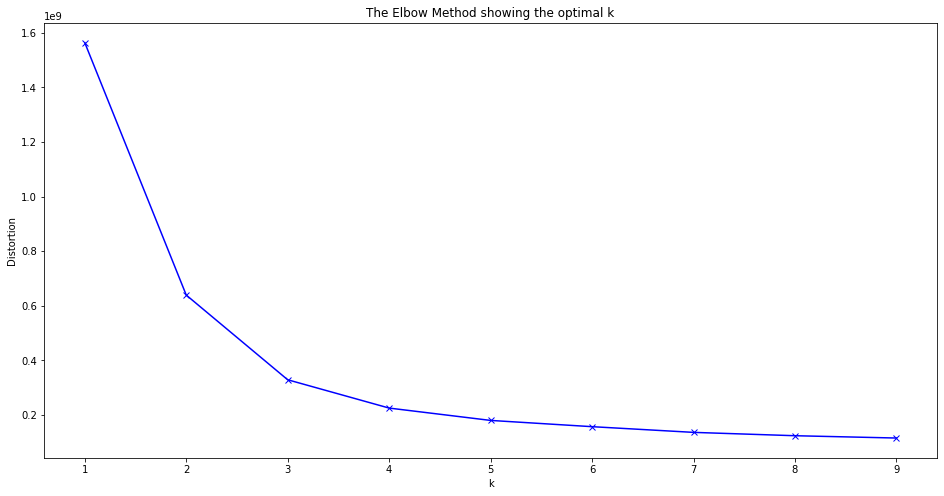

In [70]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df)
    distortions.append(kmeanModel.inertia_)
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

We can observe that the “elbow” is the number 3 which is optimal for this case. Now we can run a K-Means using as n_clusters the number 3.

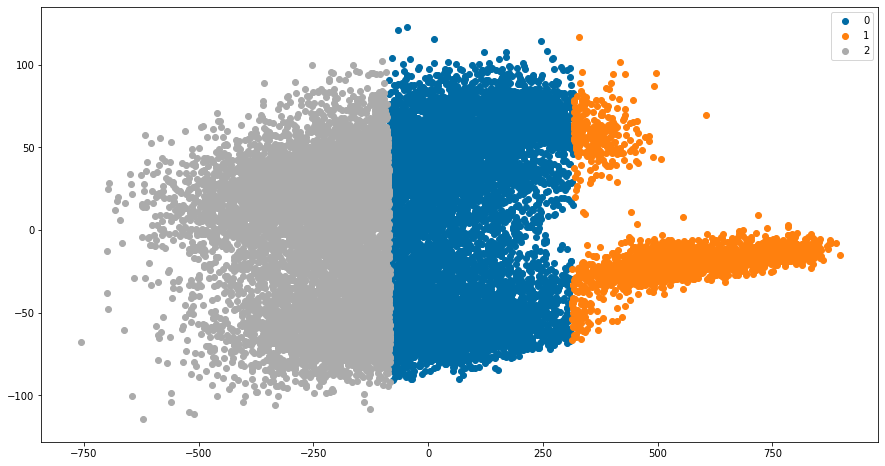

In [71]:
#Importing required modules
 
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import numpy as np
 
pca = PCA(2)
 
#Transform the data
df1 = pca.fit_transform(df)
 
#Import KMeans module
from sklearn.cluster import KMeans
 
#Initialize the class object
kmeans = KMeans(n_clusters= 3)
 
#predict the labels of clusters.
label = kmeans.fit_predict(df1)
 
#Getting unique labels
u_labels = np.unique(label)
 
X = np.array(df1)
#plotting the results:
for i in u_labels:
    plt.scatter(X[label == i , 0] , X[label == i , 1] , label = i)
plt.legend()
plt.show()

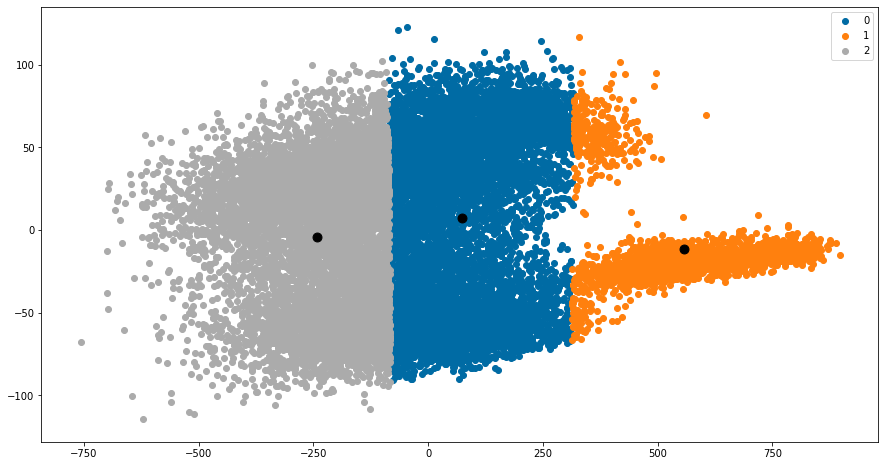

In [72]:
#Getting the Centroids
centroids = kmeans.cluster_centers_
u_labels = np.unique(label)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(X[label == i , 0] , X[label == i , 1] , label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')
plt.legend()
plt.show()

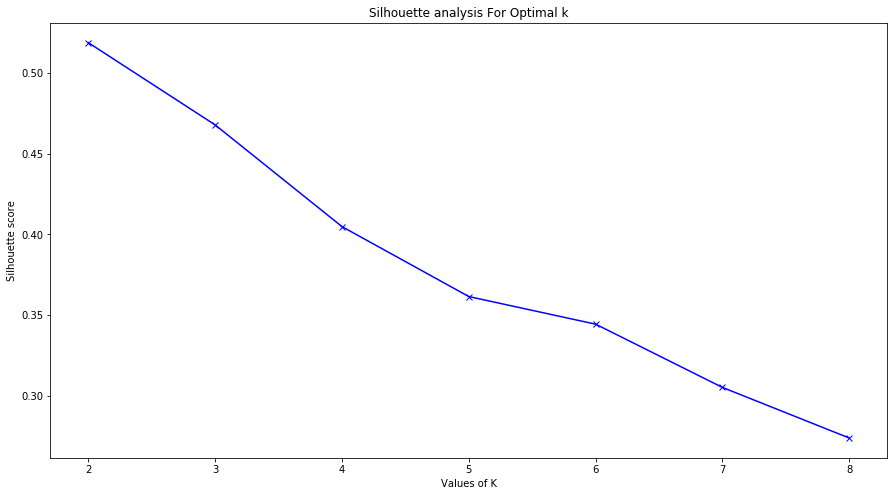

In [73]:
import sklearn
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
silhouette_avg = []
for num_clusters in range_n_clusters:
 
 # initialise kmeans
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(df)
    cluster_labels = kmeans.labels_
 
 # silhouette score
    silhouette_avg.append(silhouette_score(df, cluster_labels))
plt.plot(range_n_clusters,silhouette_avg,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Silhouette score') 
plt.title('Silhouette analysis For Optimal k')
plt.show()

We see that the silhouette score is maximized at k = 2. So, we will take 2 clusters.

#### Task 3 - Hierarchical Clustering

In [74]:
df1 = df
df1.head()

,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,Crossing,Finishing,...,GKPositioning,GKReflexes,Defending,General,Mental,Passing,Mobility,Power,Rating,Shooting
0,31,94,94,2202,5.0,4.0,4.0,10.0,84.0,95.0,...,14.0,8.0,29,89,71,87,91,74,94,88
1,33,94,94,2228,5.0,4.0,5.0,7.0,84.0,94.0,...,14.0,11.0,27,88,73,81,91,83,94,88
2,26,92,93,2143,5.0,5.0,5.0,10.0,79.0,87.0,...,15.0,11.0,28,85,72,80,94,69,92,84
3,27,91,93,1471,4.0,3.0,1.0,1.0,17.0,13.0,...,88.0,94.0,16,26,43,39,66,54,92,21
4,27,91,92,2281,4.0,5.0,4.0,7.0,93.0,82.0,...,10.0,13.0,59,79,81,92,81,76,92,85


In [75]:
#normalize the data
from sklearn.preprocessing import normalize
df1_scaled = normalize(df1)
df1_scaled = pd.DataFrame(df1_scaled, columns=df1.columns)
df1_scaled.head()

,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,Crossing,Finishing,...,GKPositioning,GKReflexes,Defending,General,Mental,Passing,Mobility,Power,Rating,Shooting
0,0.013715,0.041586,0.041586,0.974173,0.002212,0.001770,0.001770,0.004424,0.037162,0.042028,...,0.006194,0.003539,0.012830,0.039374,0.031411,0.038489,0.040259,0.032738,0.041586,0.038932
1,0.014435,0.041119,0.041119,0.974597,0.002187,0.001750,0.002187,0.003062,0.036744,0.041119,...,0.006124,0.004812,0.011811,0.038494,0.031932,0.035432,0.039806,0.036307,0.041119,0.038494
2,0.011822,0.041832,0.042287,0.974411,0.002273,0.002273,0.002273,0.004547,0.035921,0.039558,...,0.006820,0.005002,0.012731,0.038649,0.032738,0.036376,0.042741,0.031374,0.041832,0.038194
3,0.017817,0.060050,0.061370,0.970706,0.002640,0.001980,0.000660,0.000660,0.011218,0.008579,...,0.058071,0.062030,0.010558,0.017157,0.028376,0.025736,0.043553,0.035634,0.060710,0.013858
4,0.011552,0.038935,0.039363,0.975936,0.001711,0.002139,0.001711,0.002995,0.039790,0.035084,...,0.004279,0.005562,0.025243,0.033801,0.034656,0.039363,0.034656,0.032517,0.039363,0.036368


Draw the dendrogram to help us decide the number of clusters

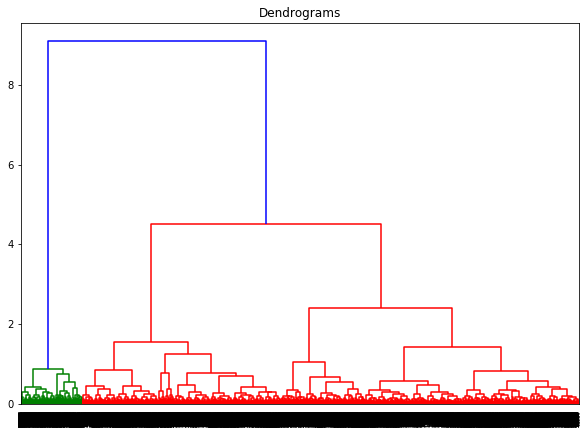

In [76]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(df1_scaled, method='ward'))

The x-axis contains the samples and y-axis represents the distance between these samples. The vertical line with maximum distance is the blue line and hence we can decide a threshold of 6 and cut the dendrogram:

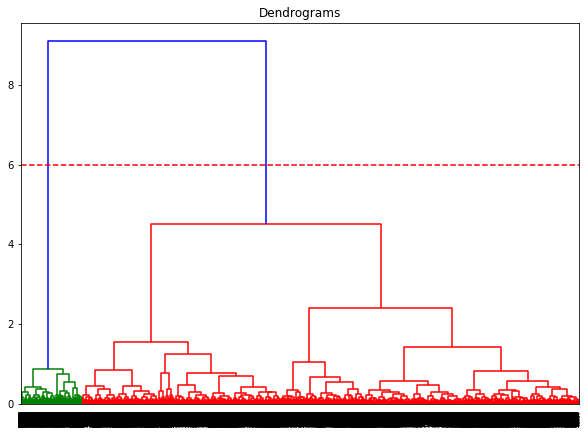

In [78]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(df1_scaled, method='ward'))
plt.axhline(y=6, color='r', linestyle='--')

We have two clusters as this line cuts the dendrogram at two points. Let’s now apply hierarchical clustering for 2 clusters:

In [79]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
cluster.fit_predict(df1_scaled)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

We can see the values of 0s and 1s in the output since we defined 2 clusters. 0 represents the points that belong to the first cluster and 1 represents points in the second cluster. Let’s now visualize the two clusters:

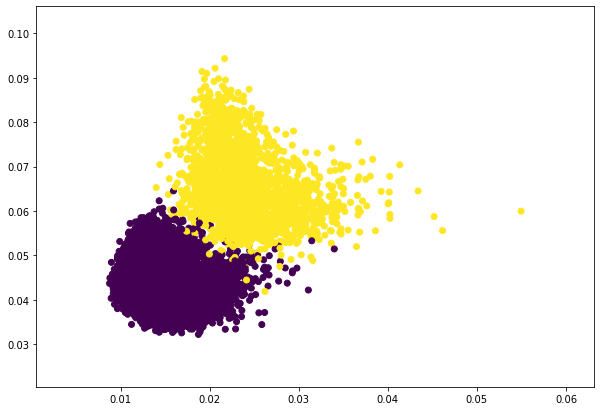

In [80]:
plt.figure(figsize=(10, 7))  
plt.scatter(df1_scaled['Age'], df1_scaled['Potential'], c=cluster.labels_) 

#### Task 4 - DBScan

In [81]:
from sklearn.cluster import DBSCAN
dbscan=DBSCAN()
dbscan.fit(df)

DBSCAN(algorithm='auto', eps=0.5, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=None, p=None)

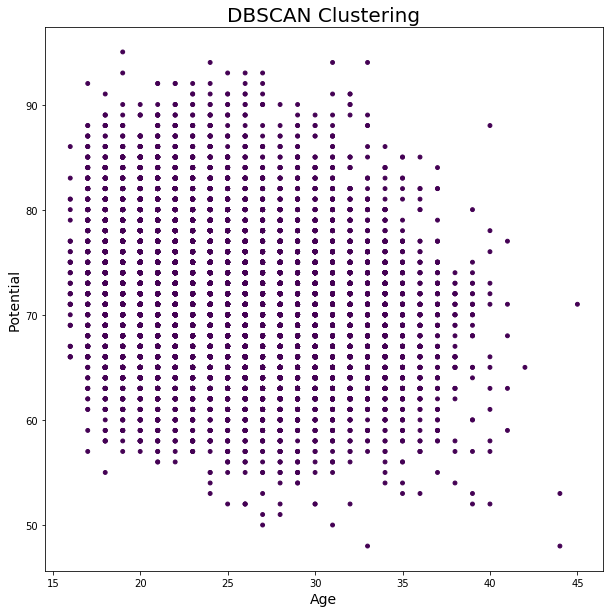

In [86]:
import matplotlib.pyplot as plt
import matplotlib
df['DBSCAN_labels']=dbscan.labels_ 

# Plotting resulting clusters
plt.figure(figsize=(10,10))
plt.scatter(df['Age'],df['Potential'],c=df['DBSCAN_labels'],s=15)
plt.title('DBSCAN Clustering',fontsize=20)
plt.xlabel('Age',fontsize=14)
plt.ylabel('Potential',fontsize=14)
plt.show()

All the data points are now of purple color which means they are treated as noise. It is because the value of epsilon is very small and we didn’t optimize parameters. Therefore, we need to find the value of epsilon and minPoints and then train our model again.

For epsilon, I am using the K-distance graph. For plotting a K-distance Graph, we need the distance between a point and its nearest data point for all data points in the dataset. We obtain this using NearestNeighbors from sklearn.neighbors.

In [88]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(df)
distances, indices = nbrs.kneighbors(df)

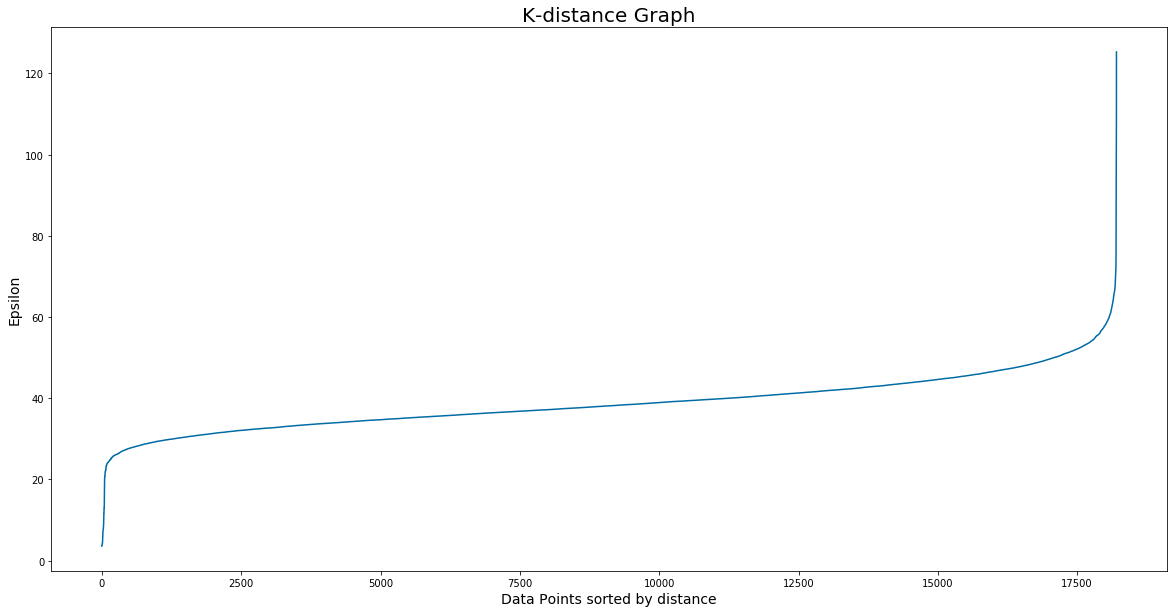

In [89]:
# Plotting K-distance Graph
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(20,10))
plt.plot(distances)
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

The optimum value of epsilon is at the point of maximum curvature in the K-Distance Graph, which is 50 in this case. Now, it’s time to find the value of minPoints. The value of minPoints also depends on domain knowledge. This time I am taking minPoints as 6:

In [90]:
from sklearn.cluster import DBSCAN
dbscan_opt=DBSCAN(eps=50,min_samples=6)
dbscan_opt.fit(df)

DBSCAN(algorithm='auto', eps=50, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=6, n_jobs=None, p=None)

In [91]:
df['DBSCAN_opt_labels']=dbscan_opt.labels_
df['DBSCAN_opt_labels'].value_counts()

 1     14791
 0      1901
-1      1416
 10       43
 6         7
 3         7
 2         7
 11        6
 7         6
 5         6
 9         5
 4         5
 12        4
 8         3
Name: DBSCAN_opt_labels, dtype: int64

-1 represents noise and remaining represents different clusters. So, there are 13 clusters.

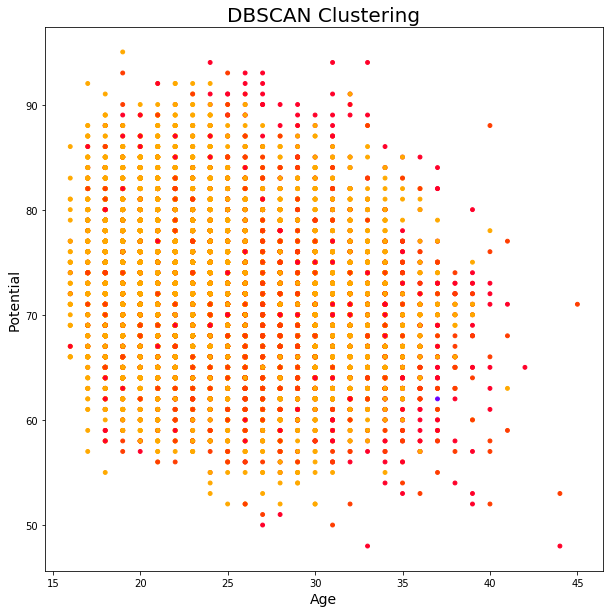

In [93]:
# Plotting the resulting clusters
plt.figure(figsize=(10,10))
plt.scatter(df['Age'],df['Potential'],c=df['DBSCAN_opt_labels'],s=15)
plt.title('DBSCAN Clustering',fontsize=20)
plt.xlabel('Age',fontsize=14)
plt.ylabel('Potential',fontsize=14)
plt.set_cmap("gist_rainbow") 
plt.show()